In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  

In [3]:
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth',100)

In [4]:
train_dingdan_data = pd.read_csv("E:/KDXF/Sales_forecast/data/商品月订单训练集.csv", encoding="gb2312")
train_xuqiu_data = pd.read_csv("E:/KDXF/Sales_forecast/data//商品需求训练集.csv", encoding="gb2312")

In [5]:
train_dingdan_data.head()

product_id type  year  month   order  start_stock  end_stock
0        1001   A1  2018      2  1129.0         47.0       70.0
1        1001   A1  2018      3  3568.0         70.0       91.0
2        1001   A1  2018      4  4560.0         91.0      110.0
3        1001   A1  2018      5  7521.0        110.0       47.0
4        1001   A1  2018      6  7687.0         47.0       41.0

In [6]:
train_dingdan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   product_id   7288 non-null   int64  
 1   type         7288 non-null   object 
 2   year         7288 non-null   int64  
 3   month        7288 non-null   int64  
 4   order        7288 non-null   float64
 5   start_stock  7178 non-null   float64
 6   end_stock    7178 non-null   float64
dtypes: float64(3), int64(3), object(1)
memory usage: 398.7+ KB


In [7]:
train_dingdan_data[train_dingdan_data["start_stock"].isna()]["product_id"].unique()

array([1023, 1026, 1027, 1068, 1102, 1104], dtype=int64)

库存数据含有空值，对比查看需求数据，库存缺失的时候也没有销量数据，猜测可能是数据没采集到，考虑删除这一部分数据，只保留不含空值的数据

In [8]:
train_dingdan_data.describe()

product_id         year        month         order  start_stock  \
count  7288.000000  7288.000000  7288.000000   7288.000000  7178.000000   
mean   1105.168771  2019.029638     6.659166   9176.872530    74.582335   
std      60.775637     0.810389     3.371458   4328.173594    92.026706   
min    1001.000000  2018.000000     1.000000   1101.000000    40.000000   
25%    1053.000000  2018.000000     4.000000   6769.000000    40.000000   
50%    1105.000000  2019.000000     7.000000   8675.000000    40.000000   
75%    1158.000000  2020.000000    10.000000  12677.000000    72.000000   
max    1210.000000  2020.000000    12.000000  17381.000000  2251.000000   

         end_stock  
count  7178.000000  
mean     77.493313  
std      92.350442  
min      40.000000  
25%      40.000000  
50%      40.000000  
75%      78.000000  
max    2251.000000

In [9]:
train_xuqiu_data.head()

product_id        date  is_sale_day  label
0        1001  2018-02-01            0  274.0
1        1001  2018-02-02            0  131.0
2        1001  2018-02-03            0    0.0
3        1001  2018-02-04            0    0.0
4        1001  2018-02-05            0    0.0

In [10]:
train_xuqiu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221744 entries, 0 to 221743
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   product_id   221744 non-null  int64  
 1   date         221744 non-null  object 
 2   is_sale_day  221744 non-null  int64  
 3   label        221744 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 6.8+ MB


In [11]:
train_xuqiu_data.describe()

product_id    is_sale_day          label
count  221744.000000  221744.000000  221744.000000
mean     1105.165281       0.170764      63.291368
std        60.773123       0.376304     231.819217
min      1001.000000       0.000000       0.000000
25%      1053.000000       0.000000       0.000000
50%      1105.000000       0.000000       0.000000
75%      1158.000000       0.000000       0.000000
max      1210.000000       1.000000    9241.000000

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


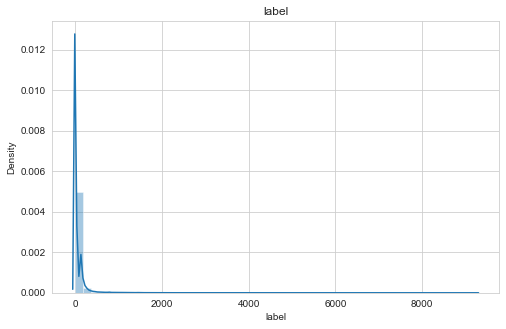

In [12]:
plt.figure(figsize = (8,5))
sns.set_style("whitegrid")
sns.distplot(train_xuqiu_data["label"], hist = True)
plt.title("label")
plt.show()

整体为偏态数据，大部分数据都为0，做月汇总，查看月数据

In [13]:
train_xuqiu_data["date"] = pd.to_datetime(train_xuqiu_data["date"])
train_xuqiu_data["year"] = train_xuqiu_data["date"].dt.year
train_xuqiu_data["month"] = train_xuqiu_data["date"].dt.month
train_xuqiu_data["year_month"] = train_xuqiu_data["date"].dt.strftime("%Y%m")

In [14]:
train_data = train_xuqiu_data.merge(train_dingdan_data, how="left", on=["product_id", "year", "month"])

In [15]:
train_data.head()

product_id       date  is_sale_day  label  year  month year_month type  \
0        1001 2018-02-01            0  274.0  2018      2     201802   A1   
1        1001 2018-02-02            0  131.0  2018      2     201802   A1   
2        1001 2018-02-03            0    0.0  2018      2     201802   A1   
3        1001 2018-02-04            0    0.0  2018      2     201802   A1   
4        1001 2018-02-05            0    0.0  2018      2     201802   A1   

    order  start_stock  end_stock  
0  1129.0         47.0       70.0  
1  1129.0         47.0       70.0  
2  1129.0         47.0       70.0  
3  1129.0         47.0       70.0  
4  1129.0         47.0       70.0

In [16]:
train_data["label_month"] = train_data.groupby(["product_id","year","month"])["label"].transform("sum")

In [17]:
train_data["sale_num"] = train_data.groupby(["product_id","year","month"])["is_sale_day"].transform("sum")

In [18]:
train_data["sale_day_0"] = list(map(lambda x: 1 if x == 0 else 0,train_data["is_sale_day"] ))
train_data["sale_day_1"] = list(map(lambda x: 1 if x == 1 else 0,train_data["is_sale_day"] ))

In [19]:
train_data = train_data.drop_duplicates(["product_id","year","month"])

In [22]:
train_data["stock_diff"] = train_data["start_stock"] - train_data["end_stock"]

In [20]:
del train_data["date"]
del train_data["label"]

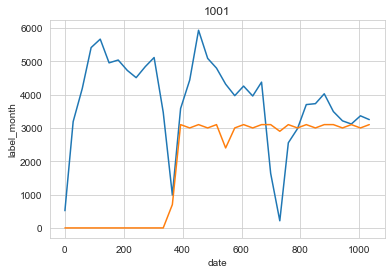

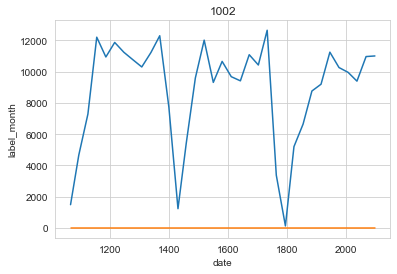

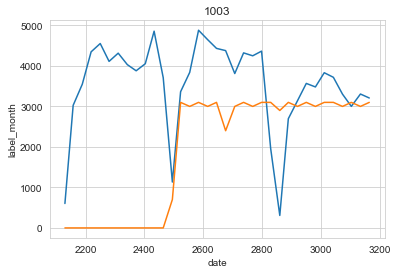

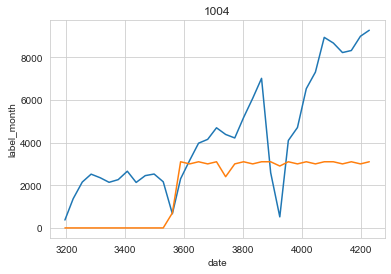

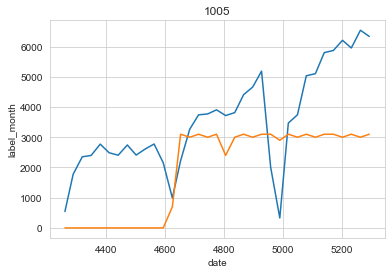

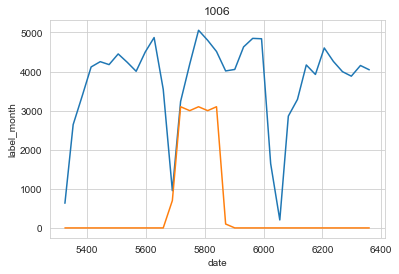

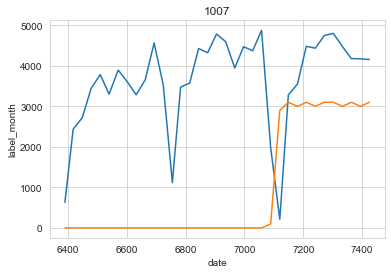

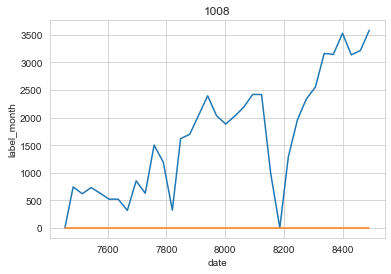

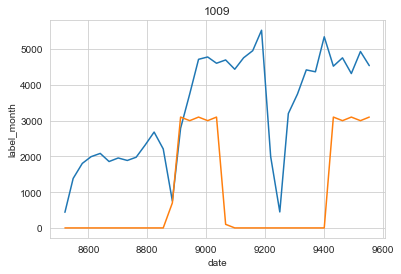

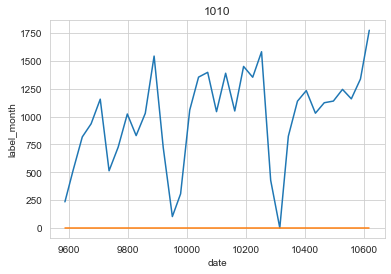

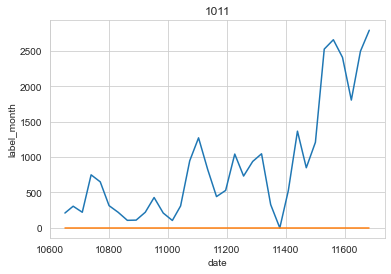

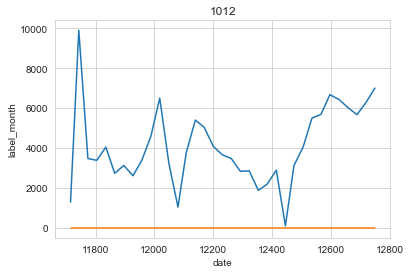

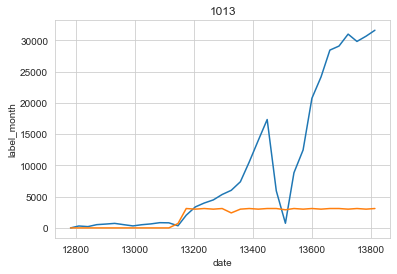

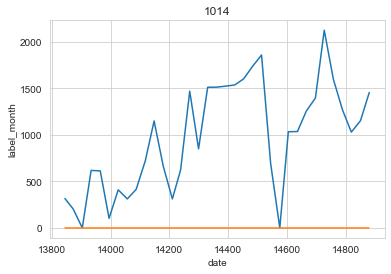

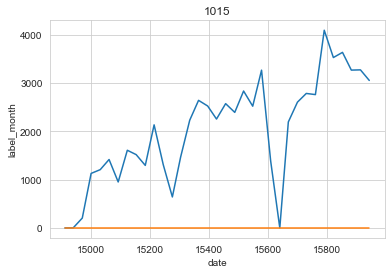

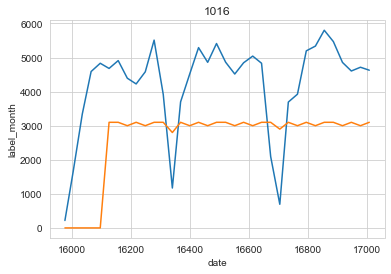

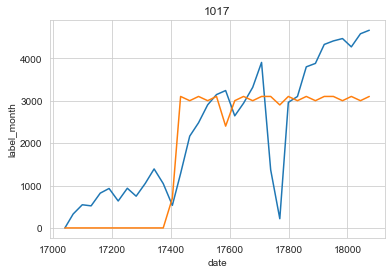

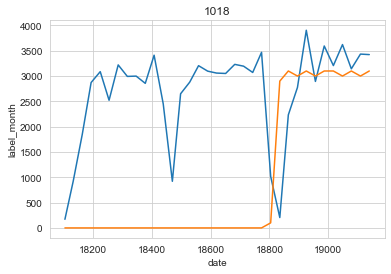

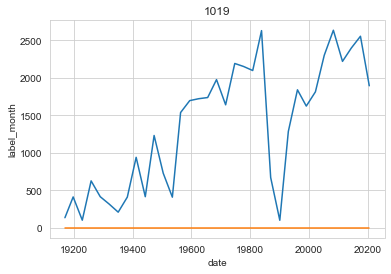

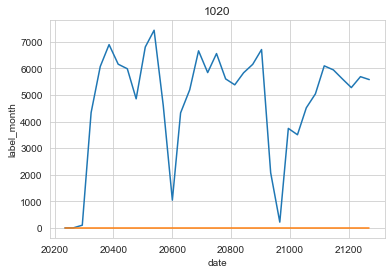

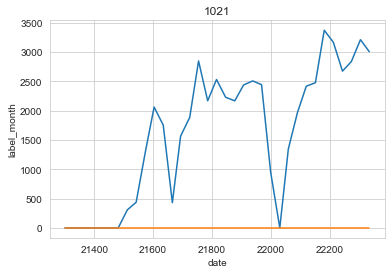

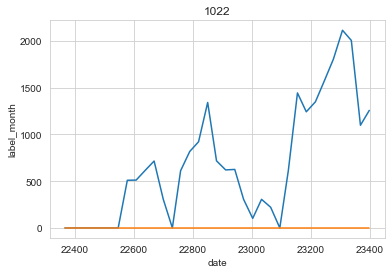

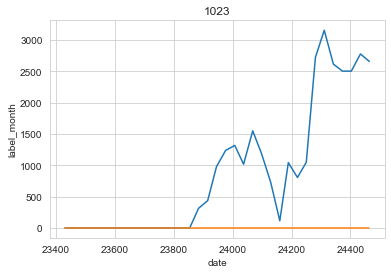

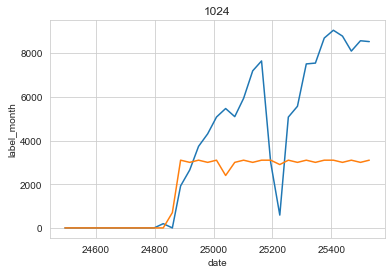

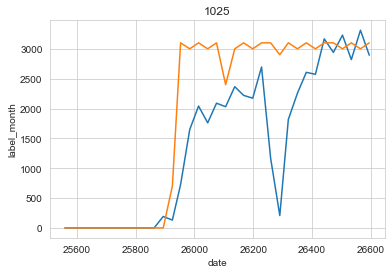

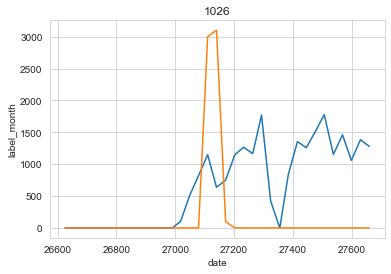

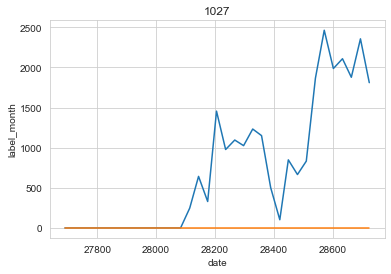

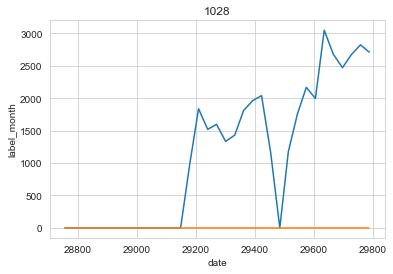

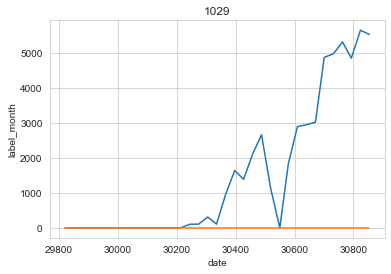

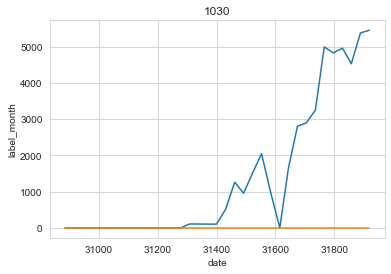

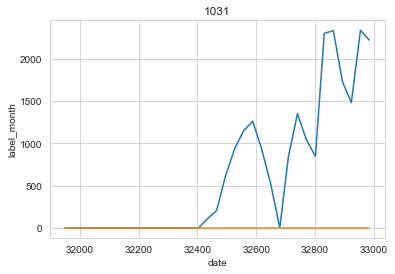

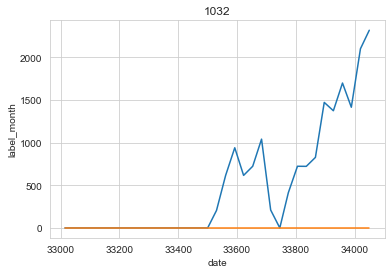

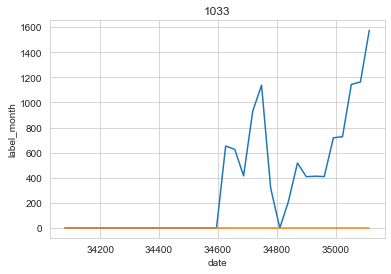

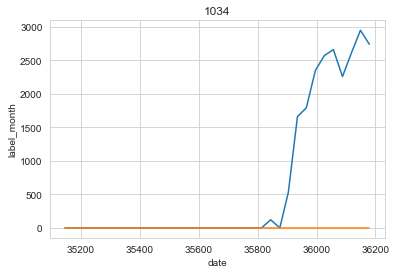

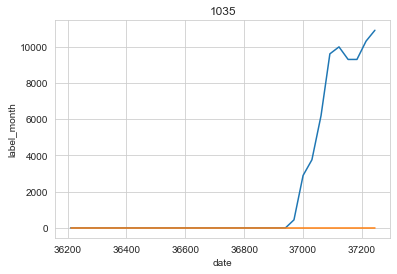

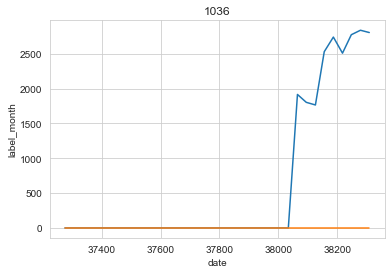

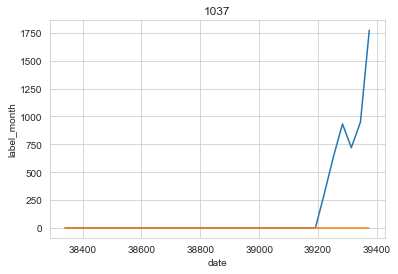

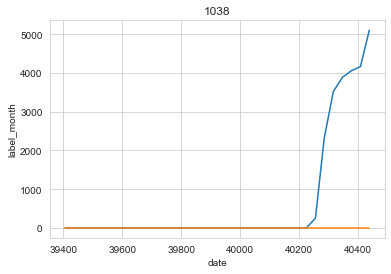

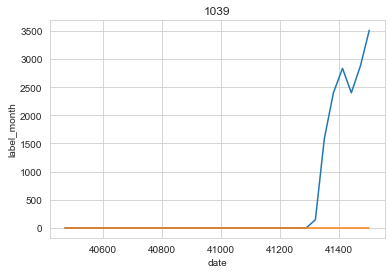

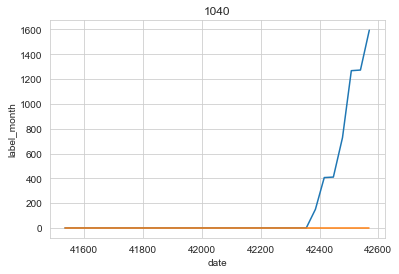

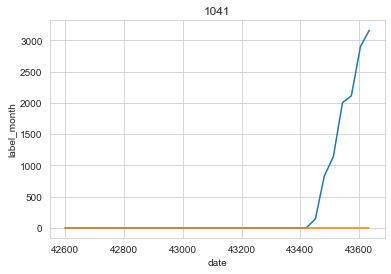

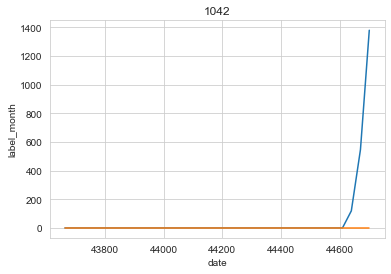

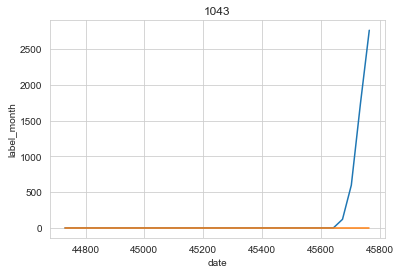

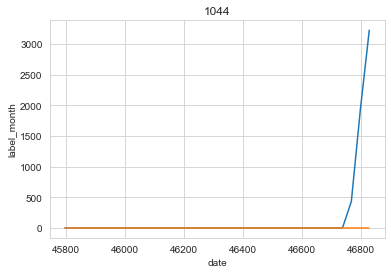

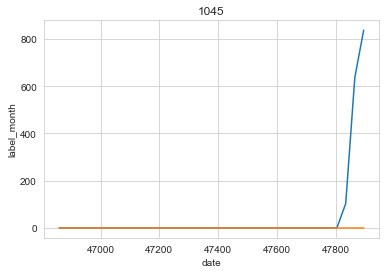

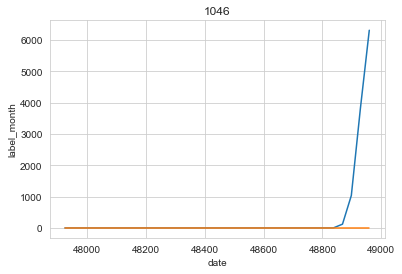

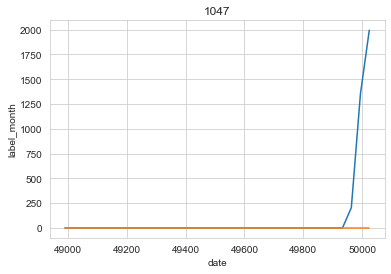

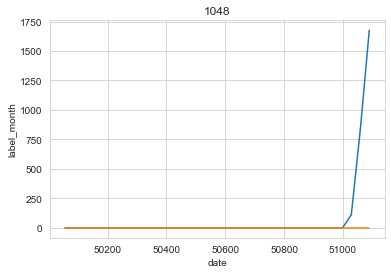

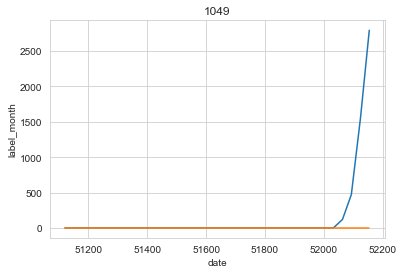

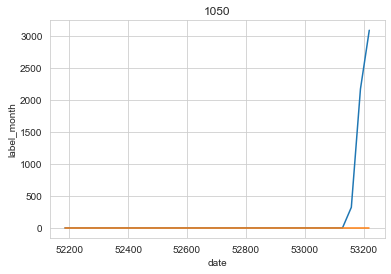

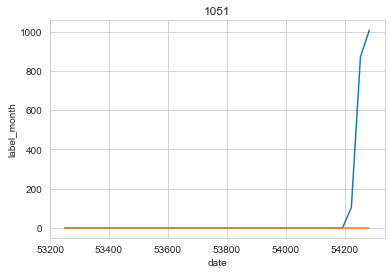

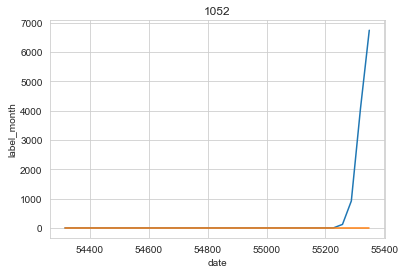

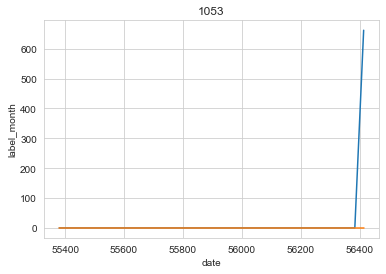

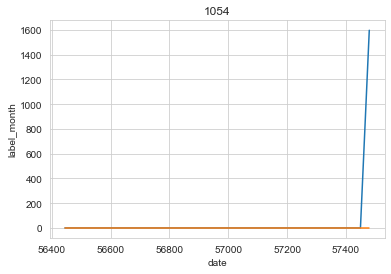

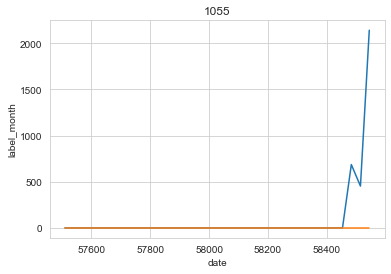

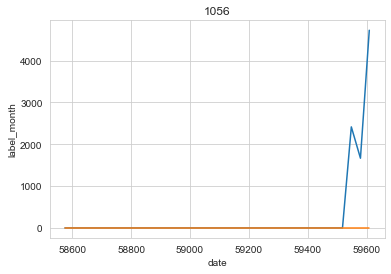

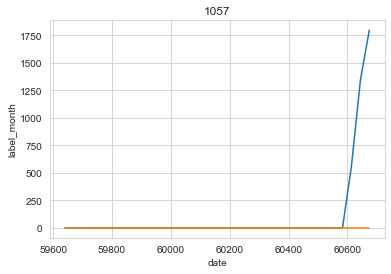

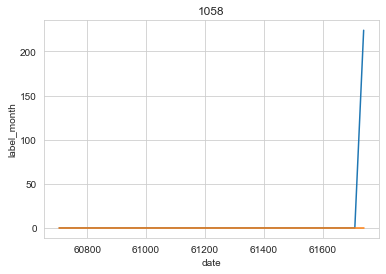

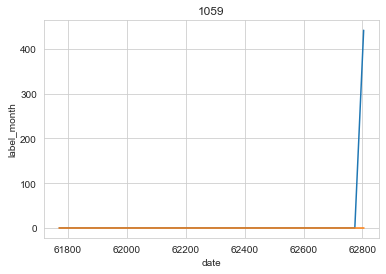

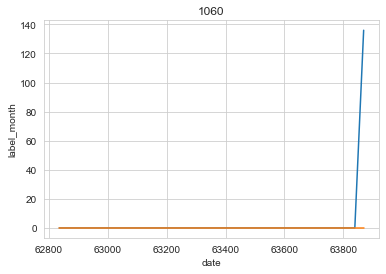

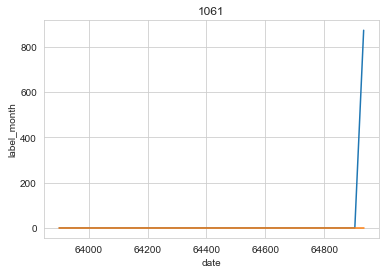

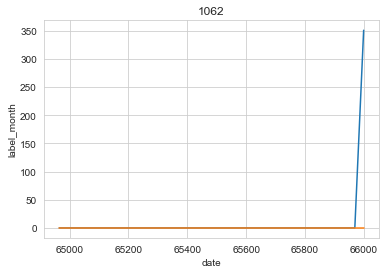

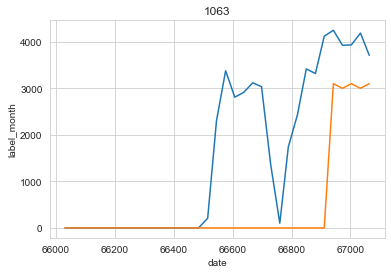

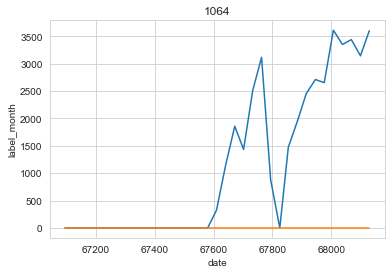

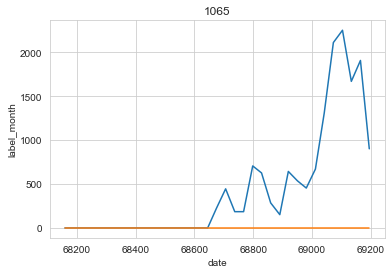

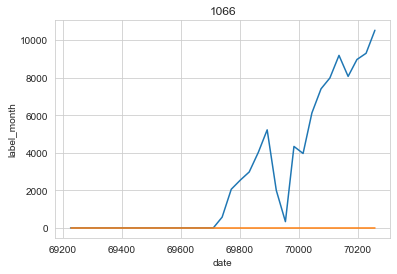

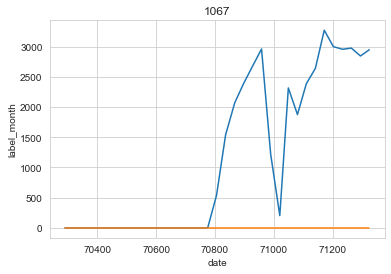

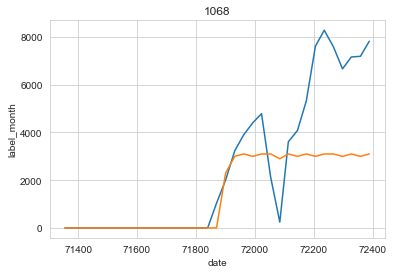

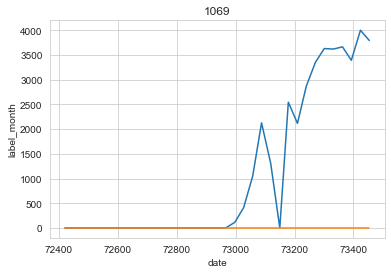

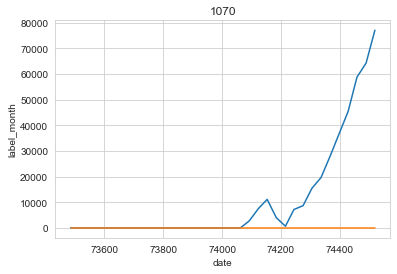

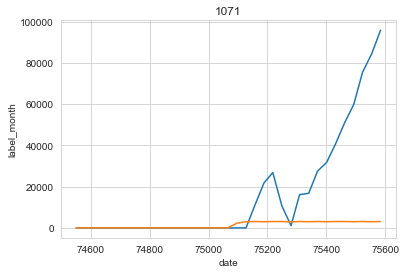

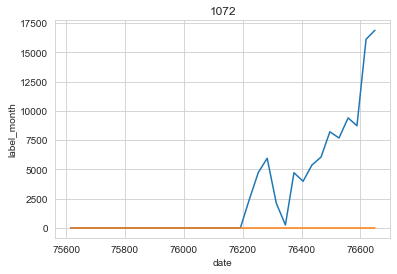

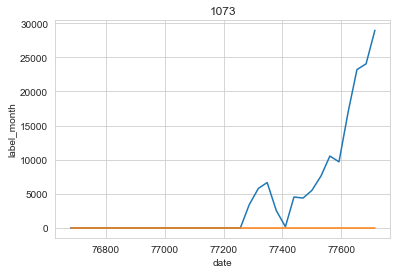

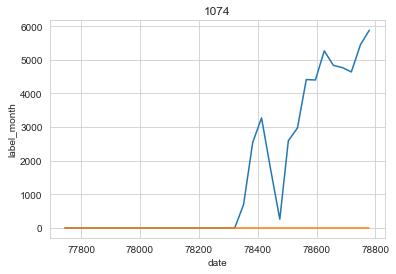

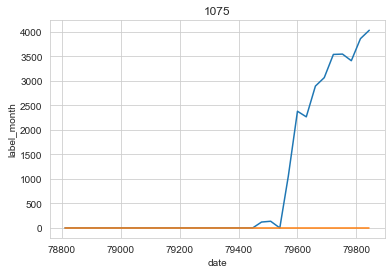

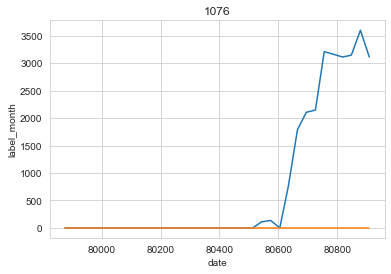

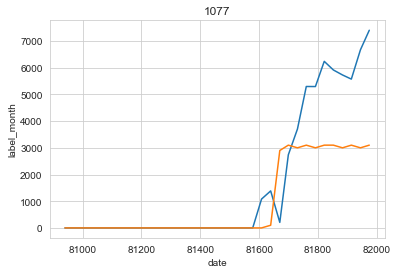

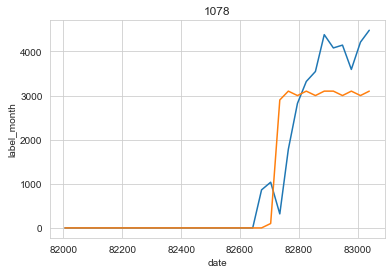

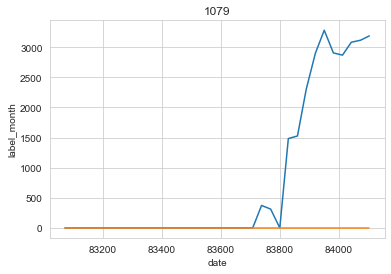

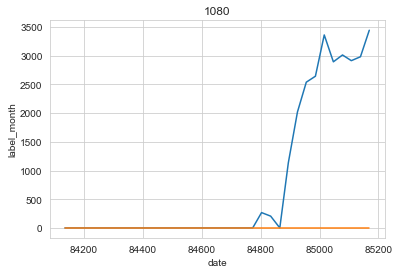

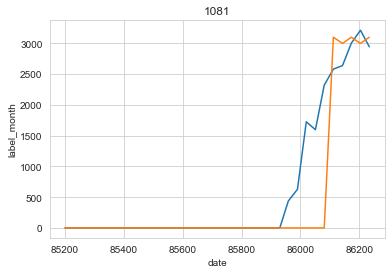

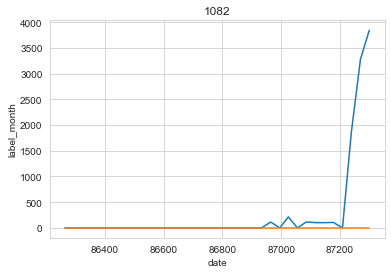

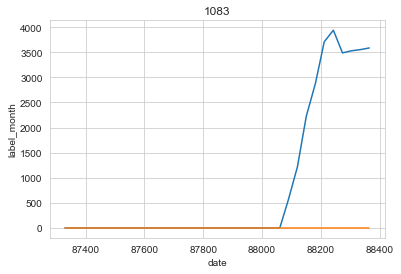

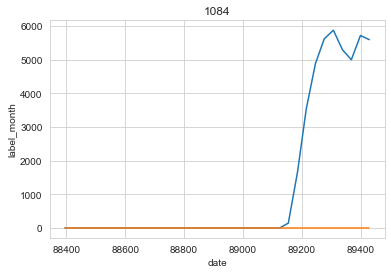

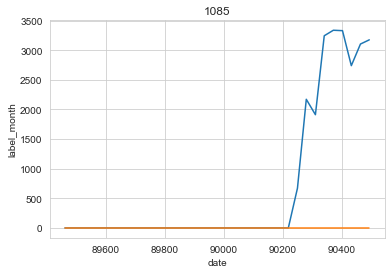

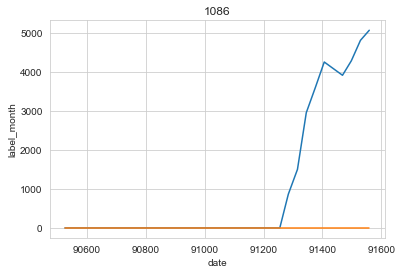

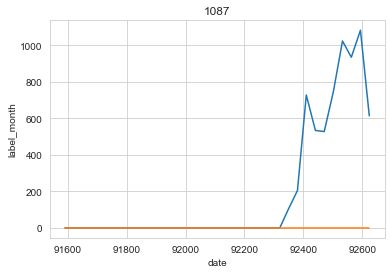

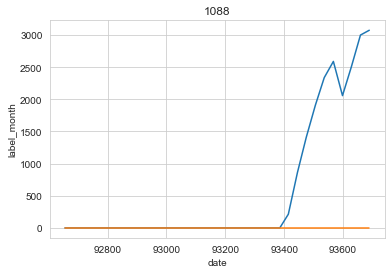

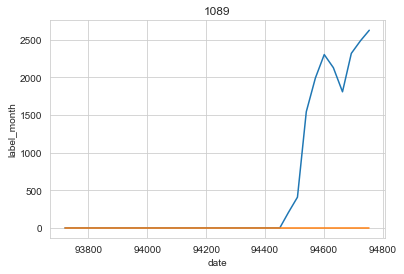

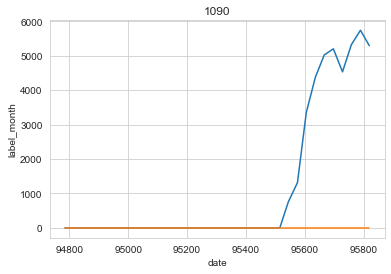

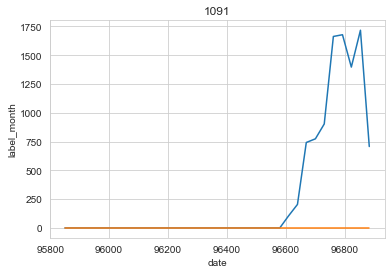

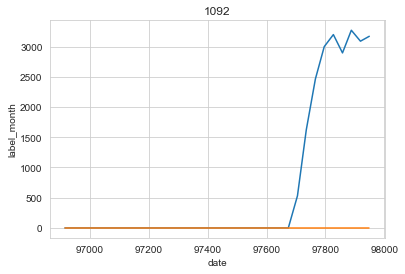

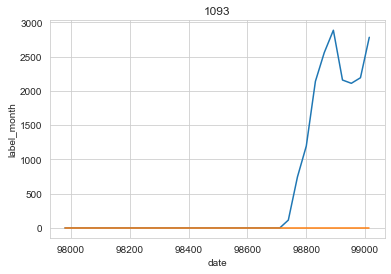

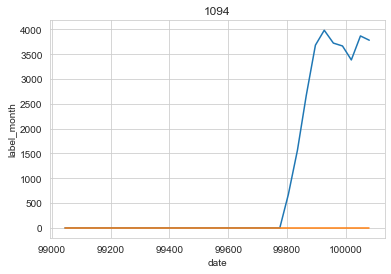

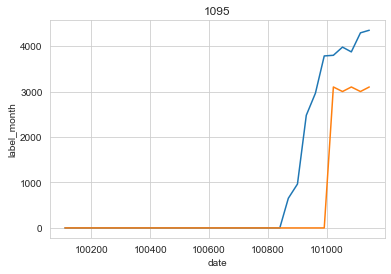

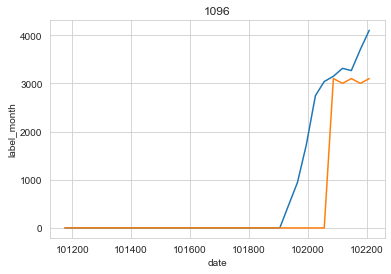

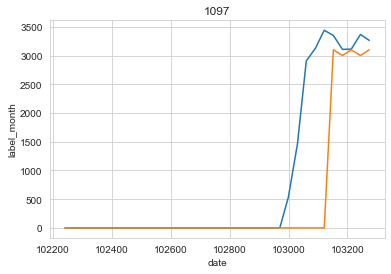

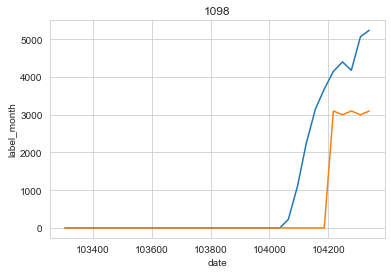

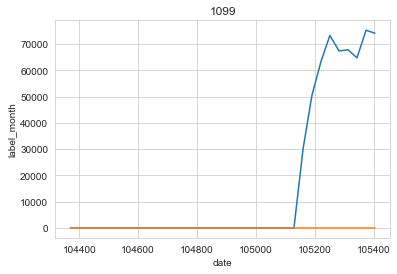

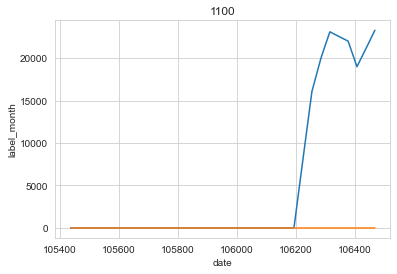

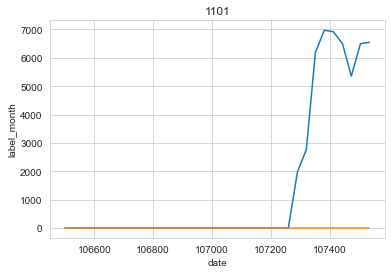

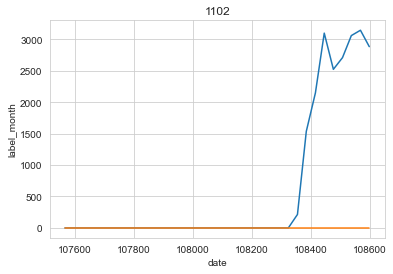

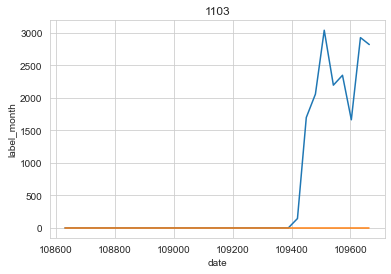

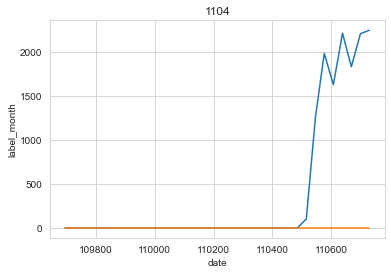

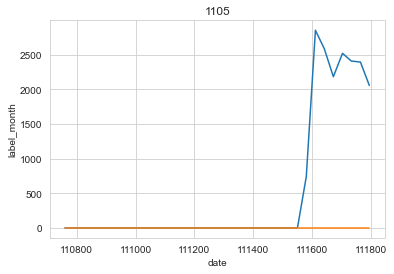

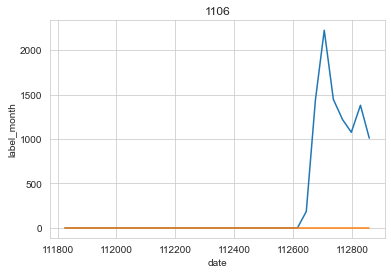

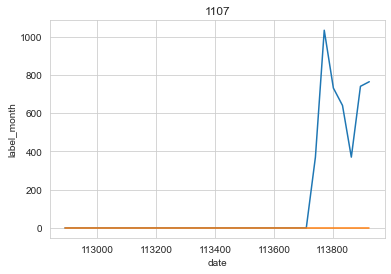

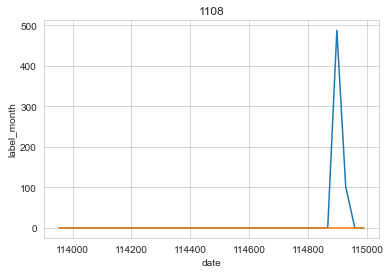

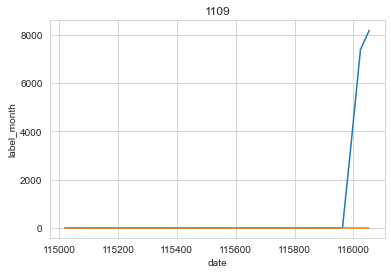

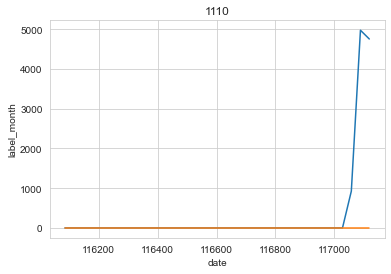

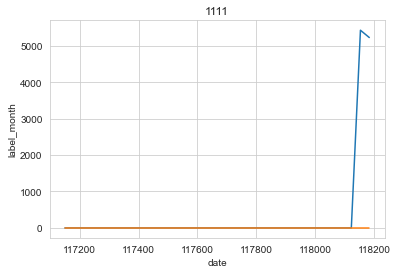

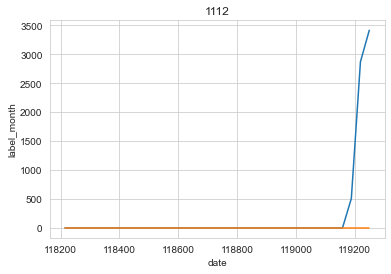

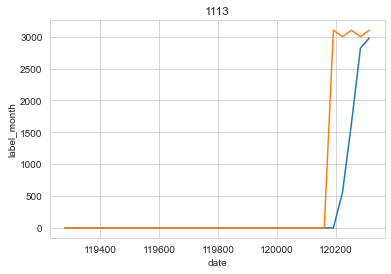

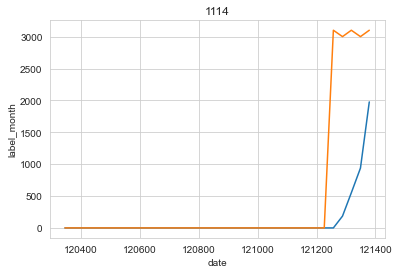

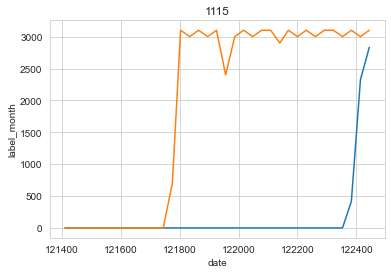

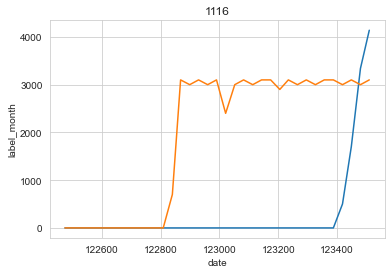

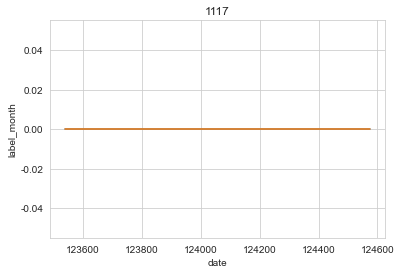

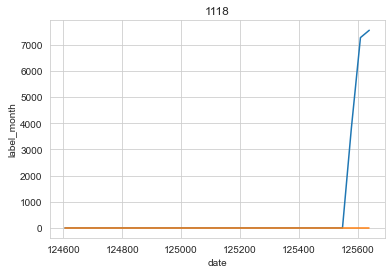

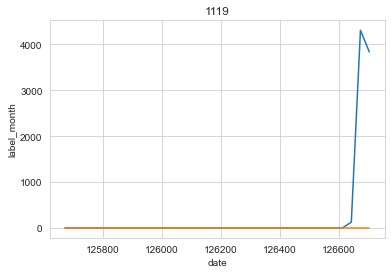

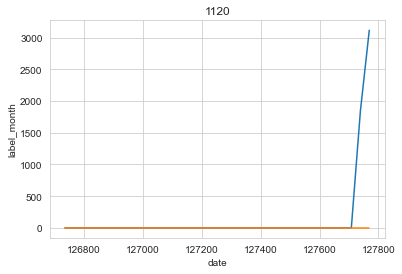

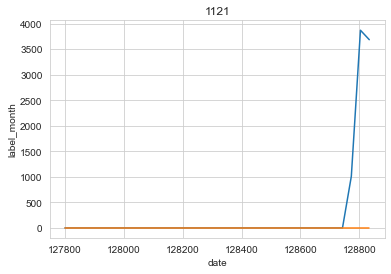

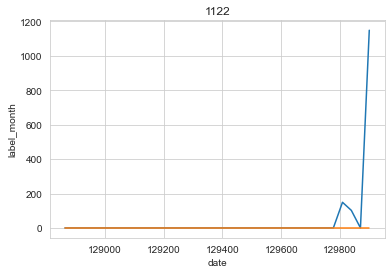

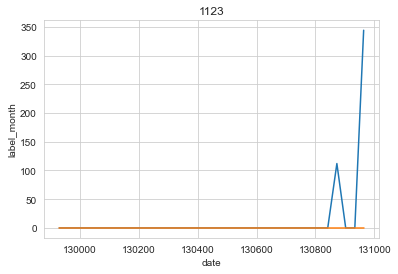

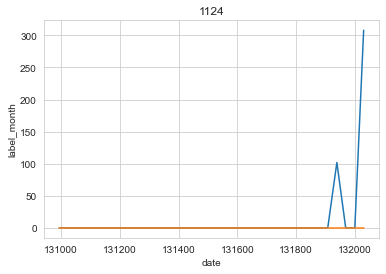

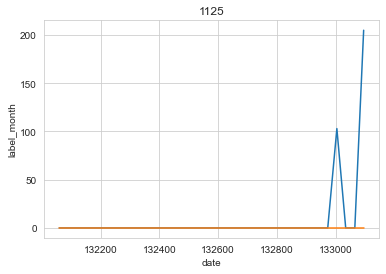

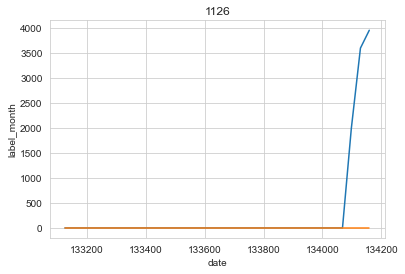

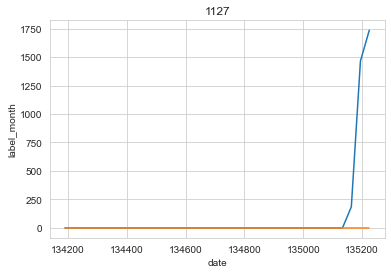

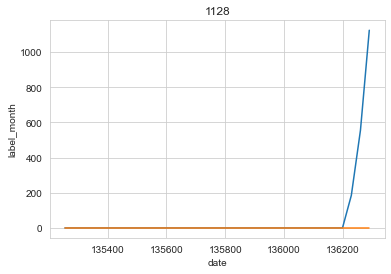

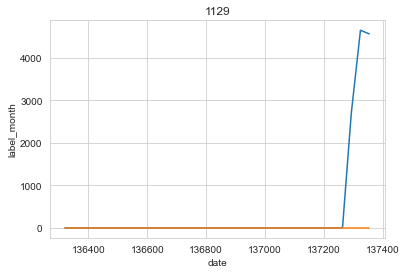

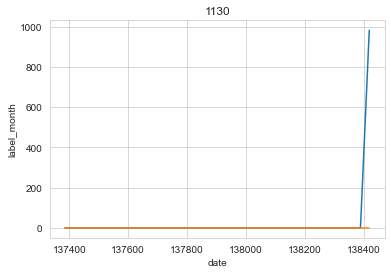

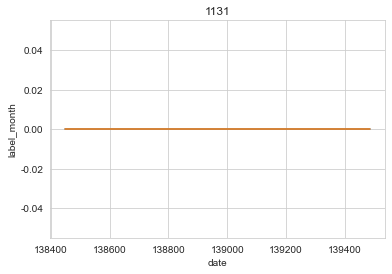

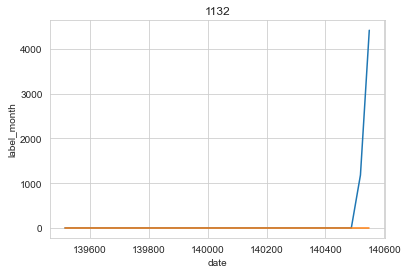

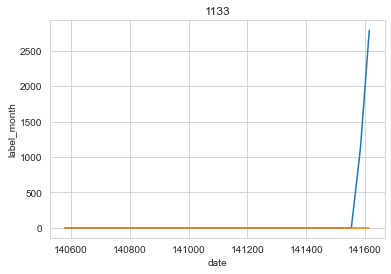

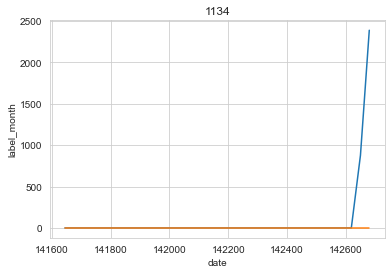

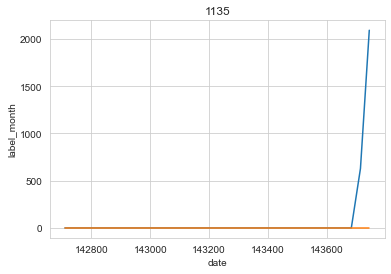

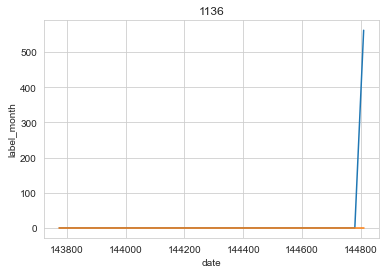

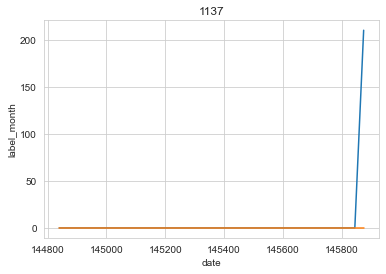

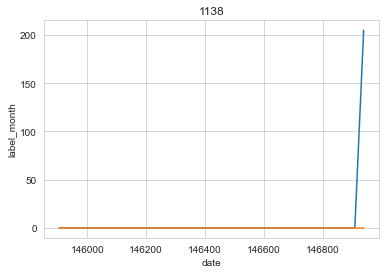

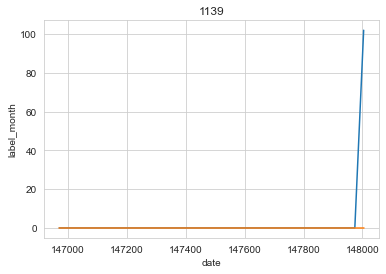

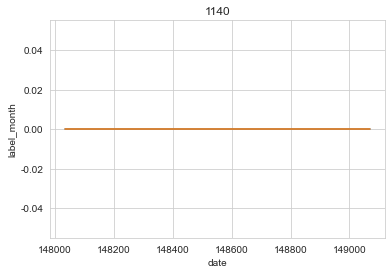

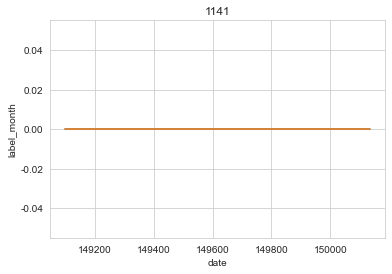

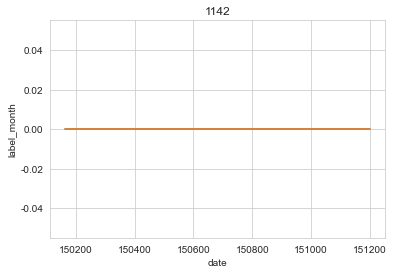

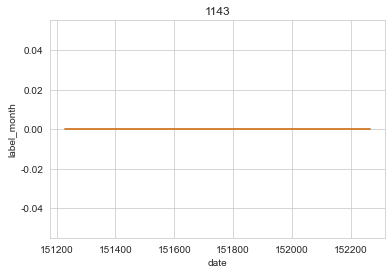

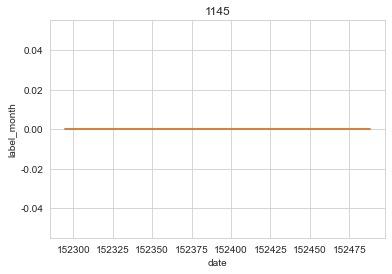

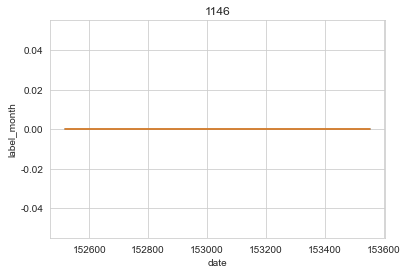

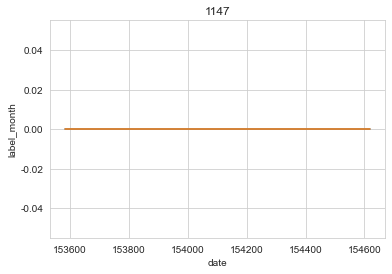

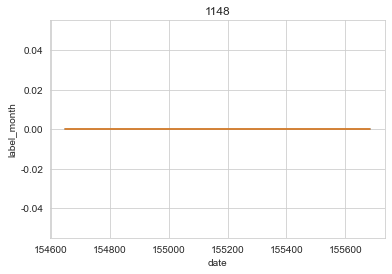

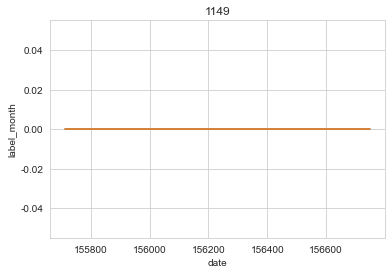

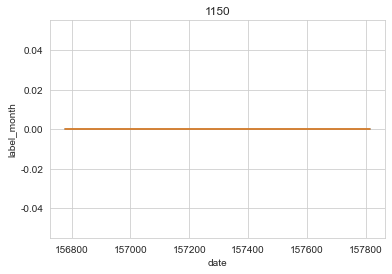

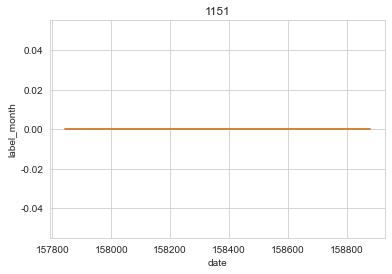

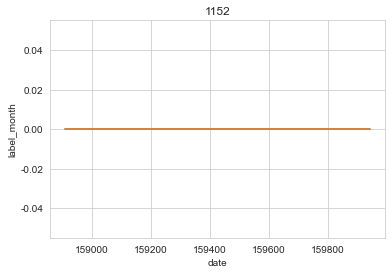

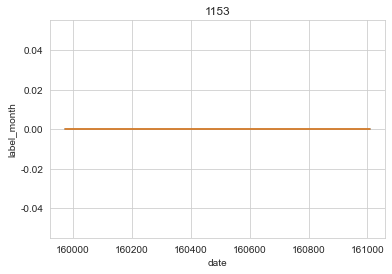

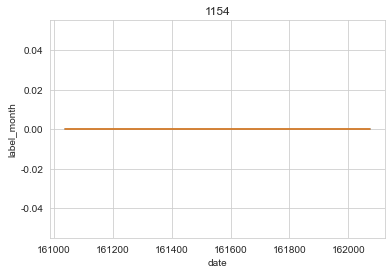

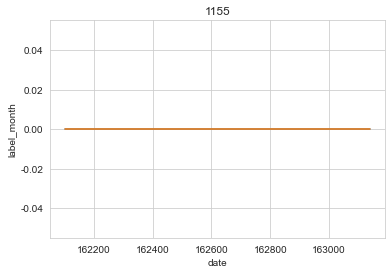

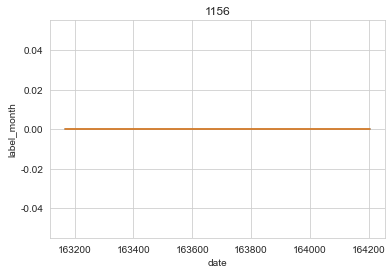

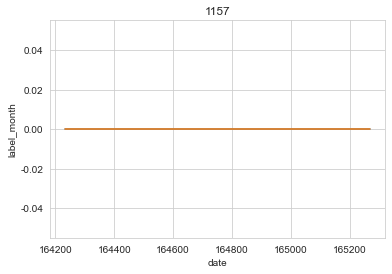

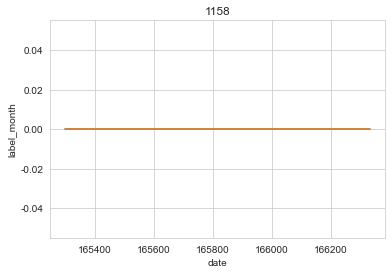

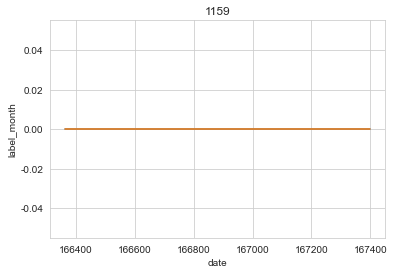

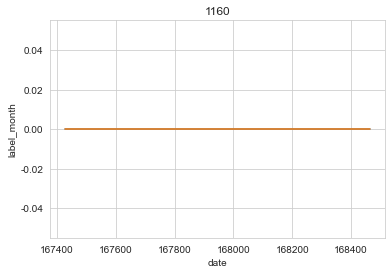

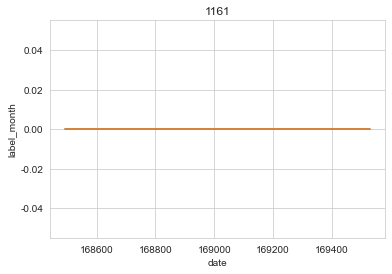

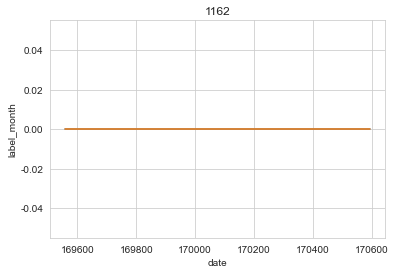

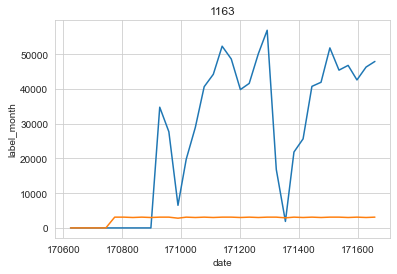

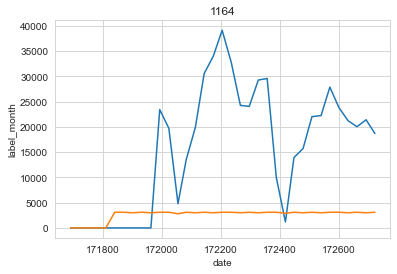

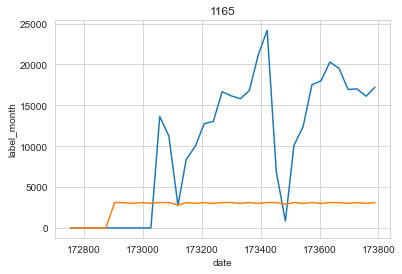

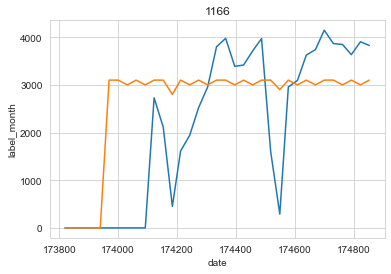

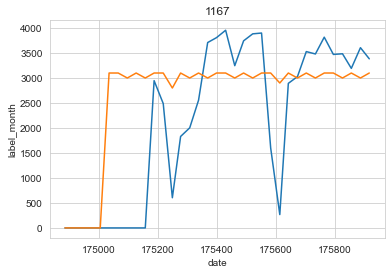

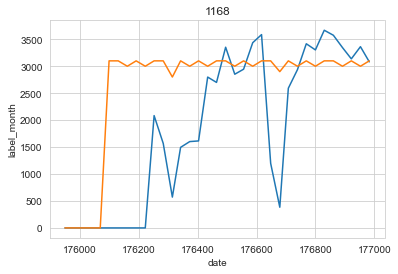

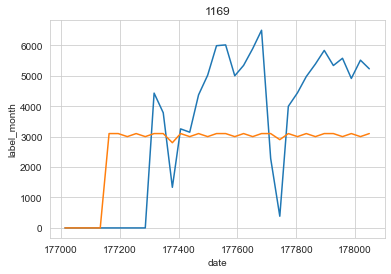

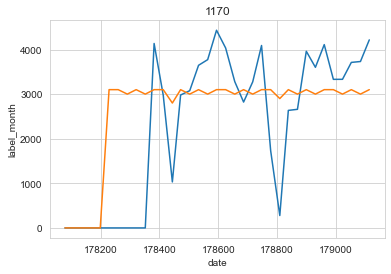

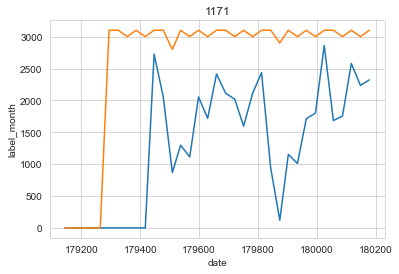

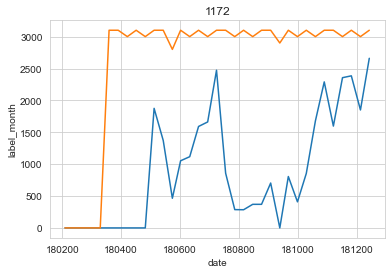

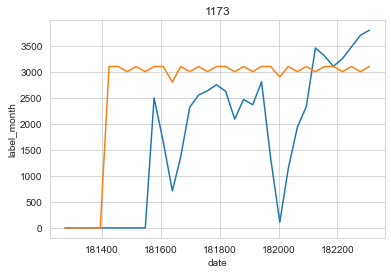

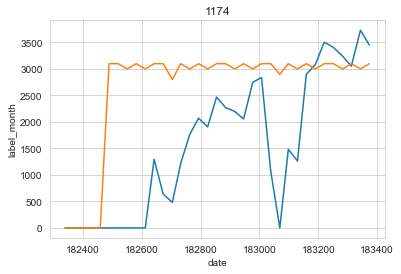

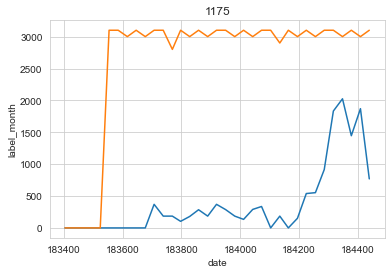

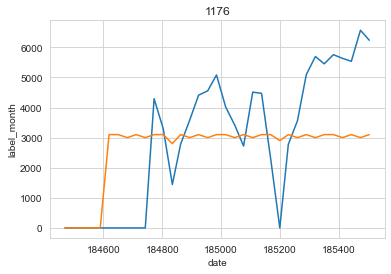

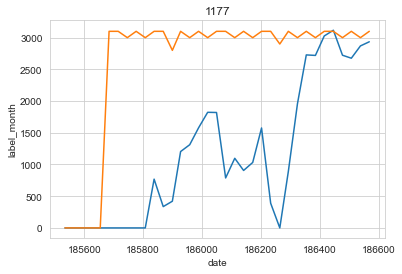

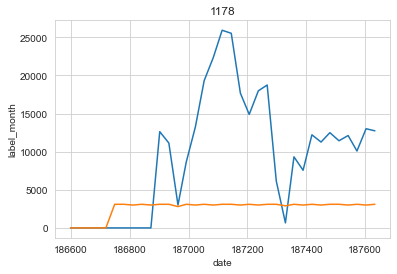

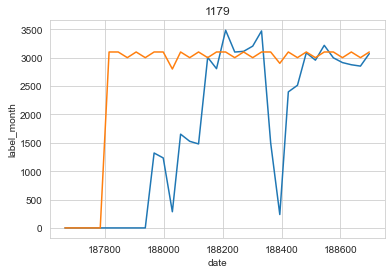

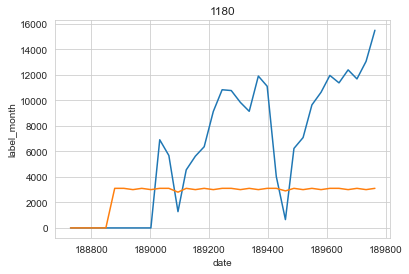

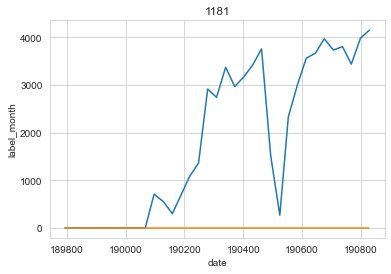

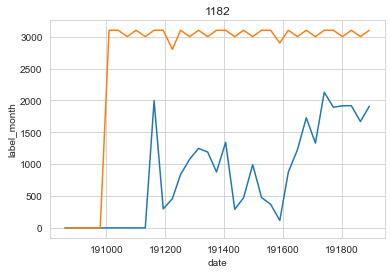

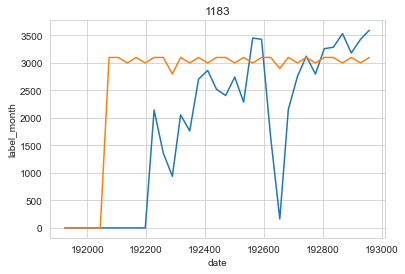

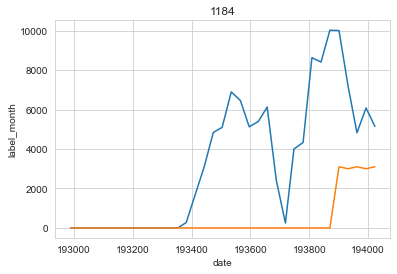

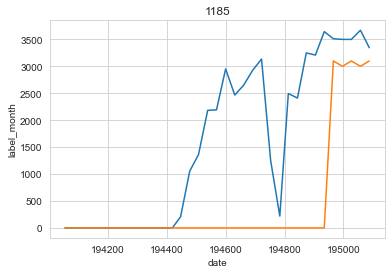

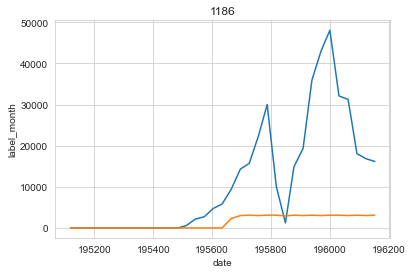

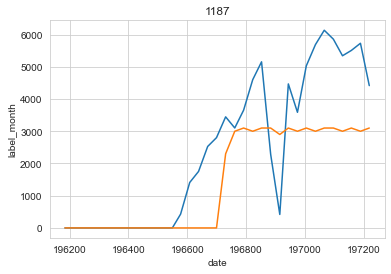

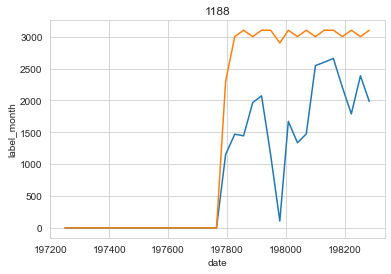

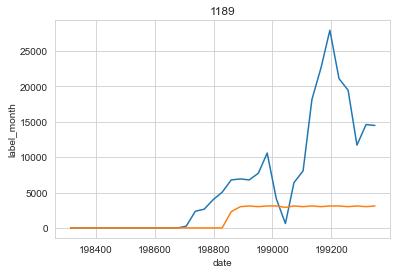

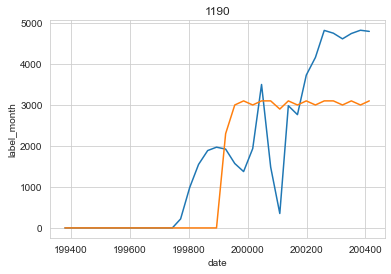

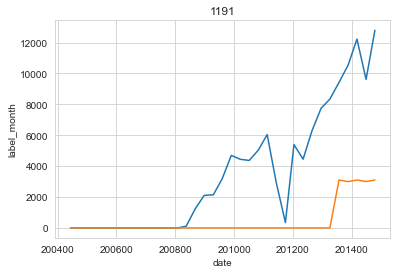

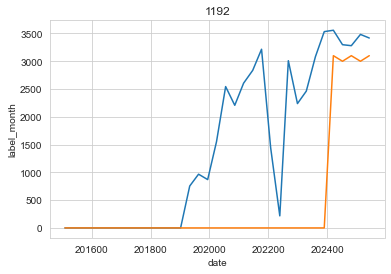

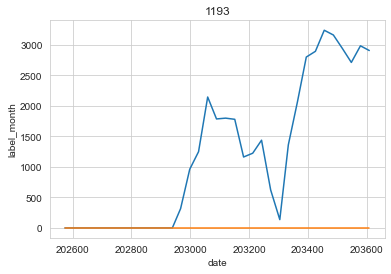

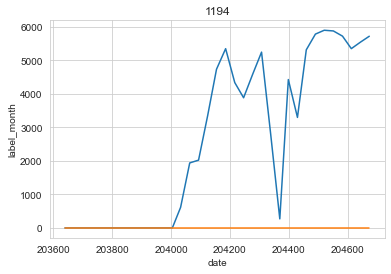

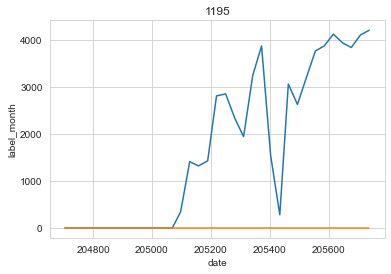

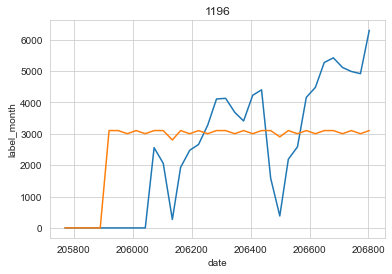

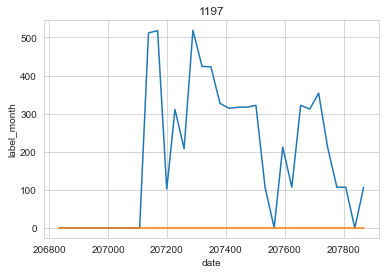

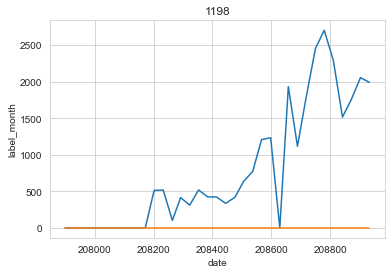

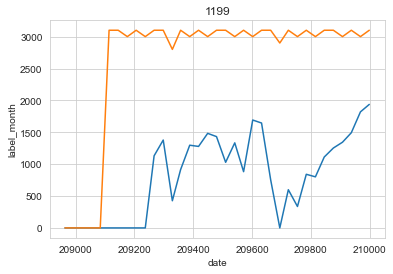

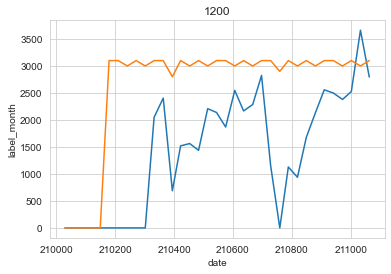

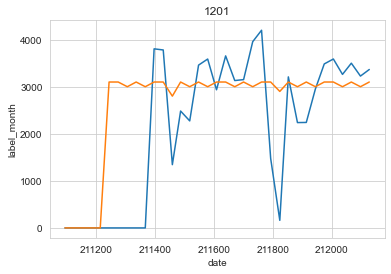

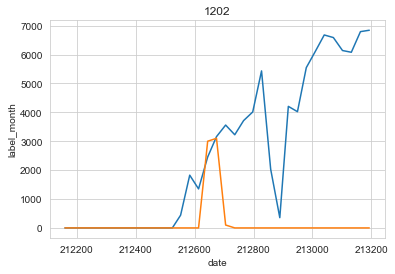

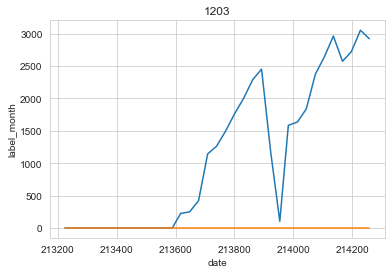

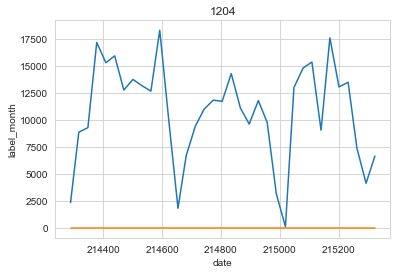

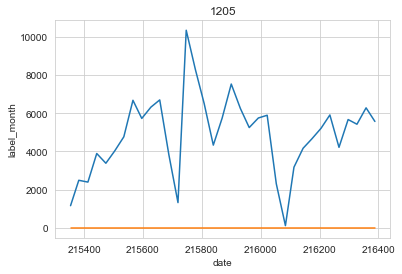

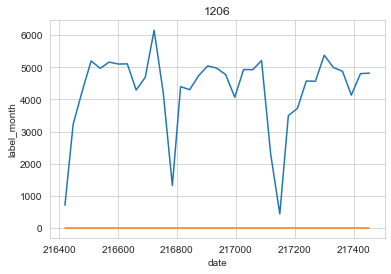

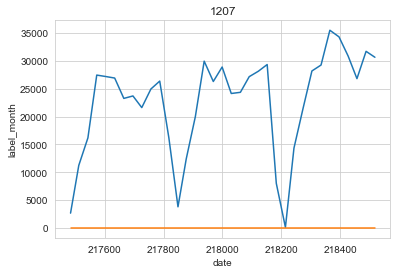

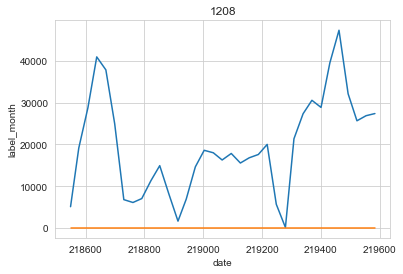

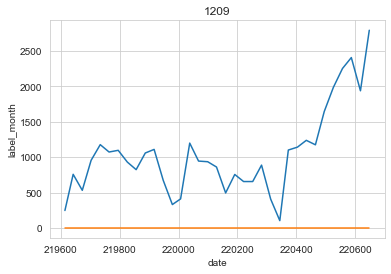

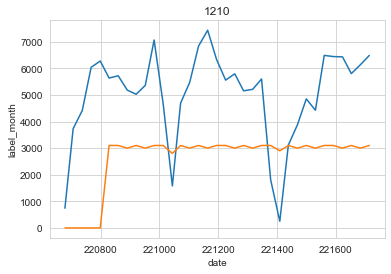

In [21]:
for i in train_data["product_id"].unique():
    data = train_data[train_data["product_id"] == i]
    plt.figure()
    plt.plot(data.index, data.label_month)
    plt.plot(data.index, data.sale_num*100)
    plt.title(i)
    plt.xlabel("date")
    plt.ylabel("label_month")
    plt.show()

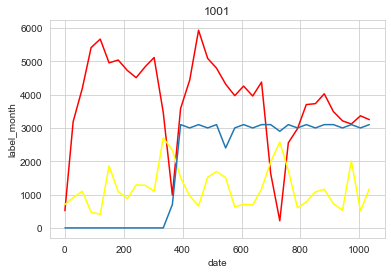

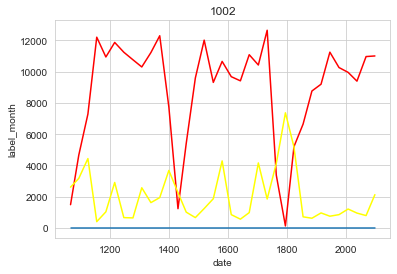

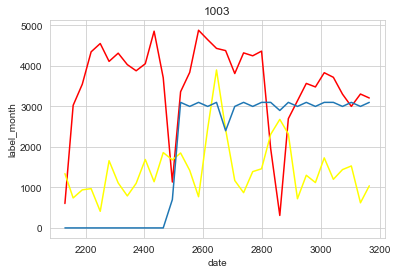

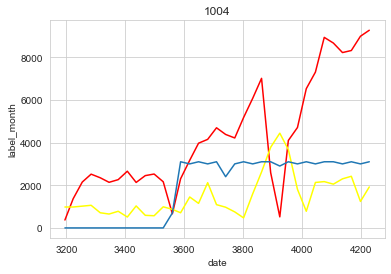

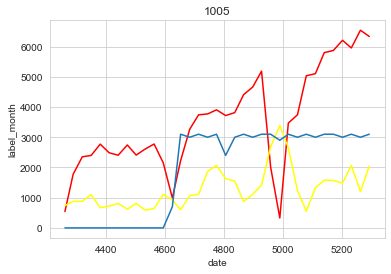

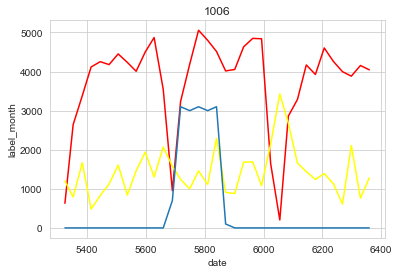

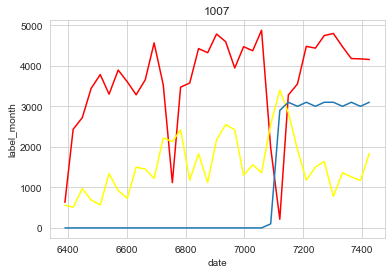

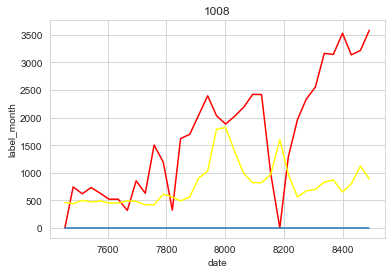

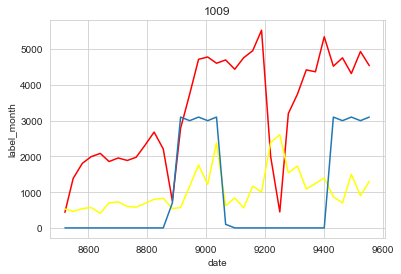

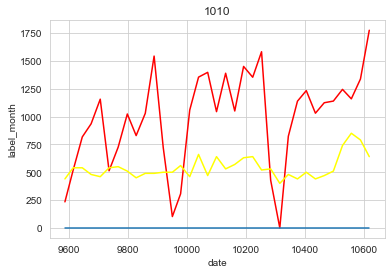

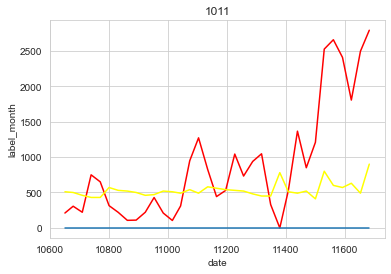

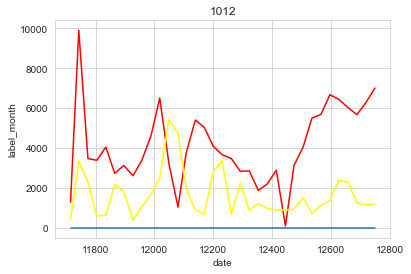

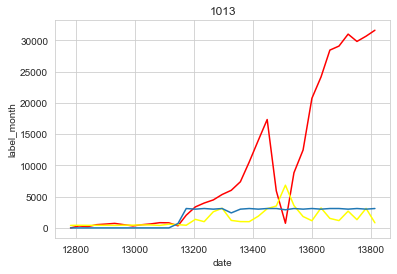

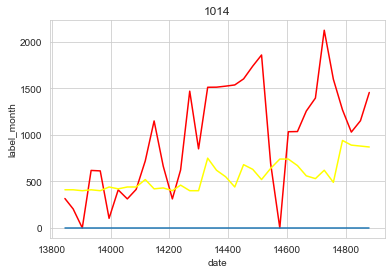

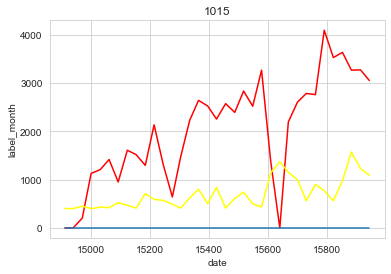

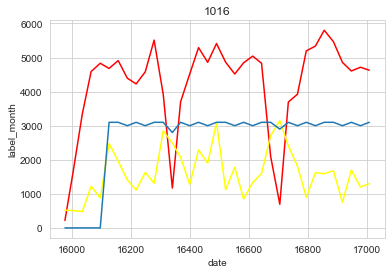

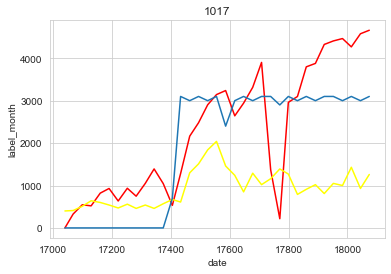

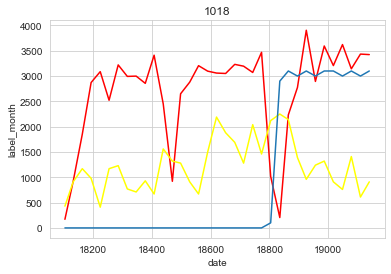

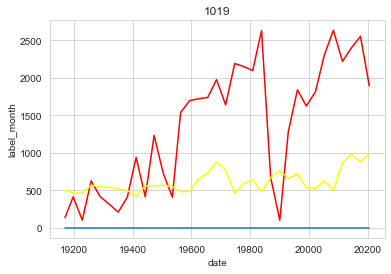

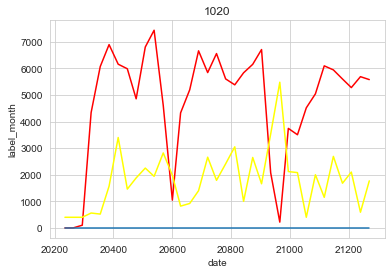

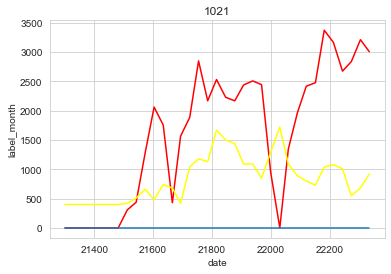

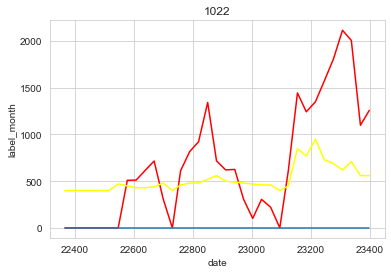

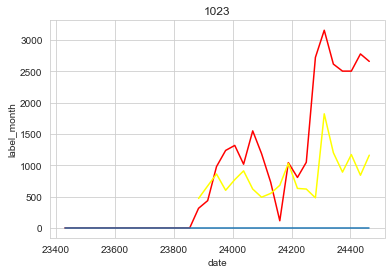

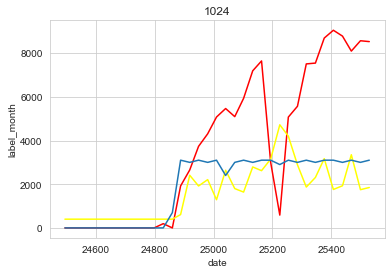

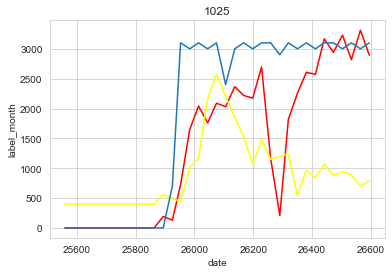

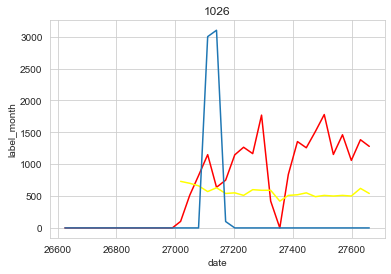

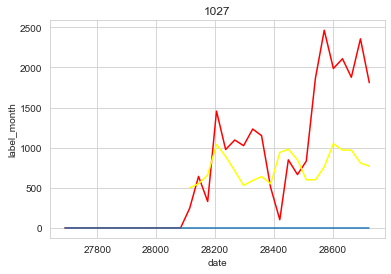

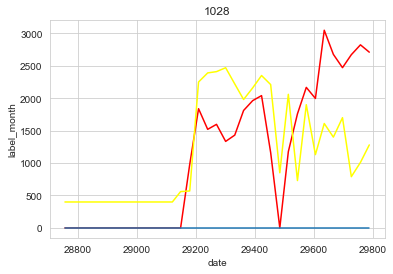

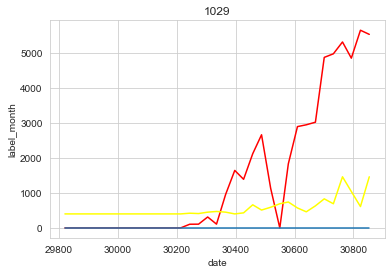

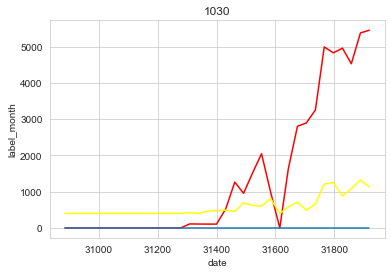

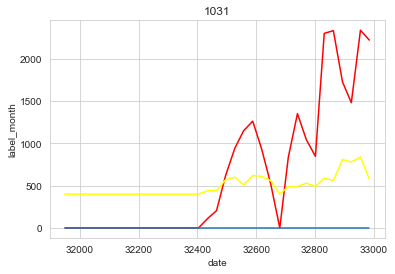

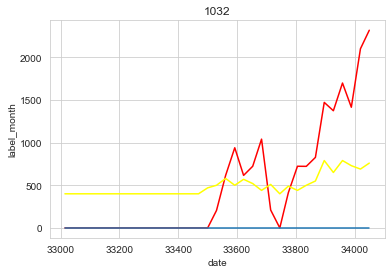

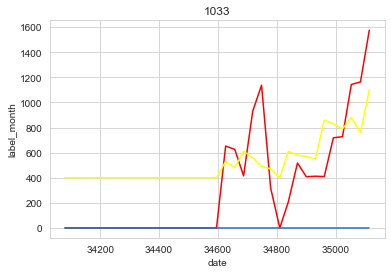

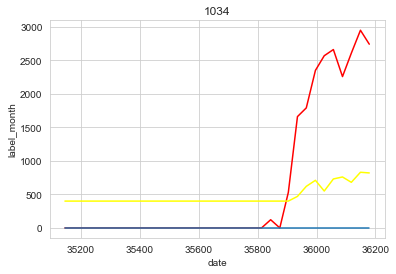

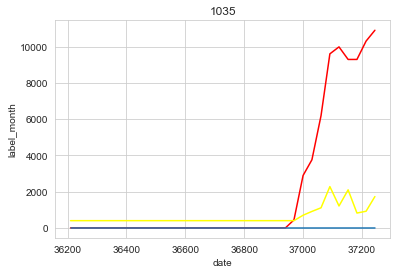

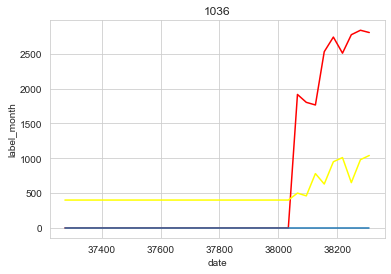

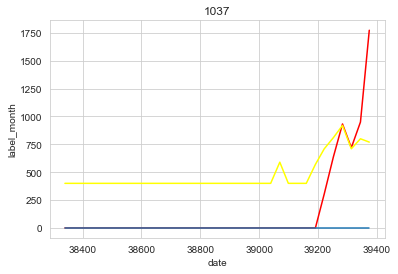

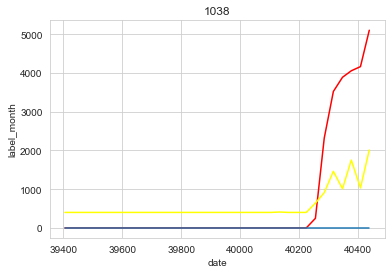

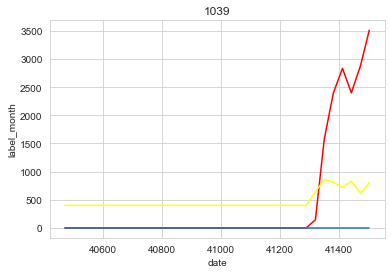

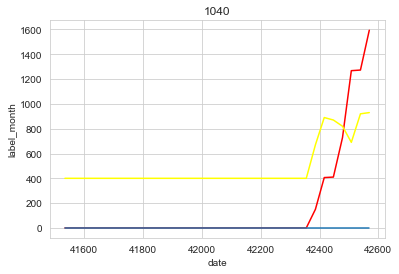

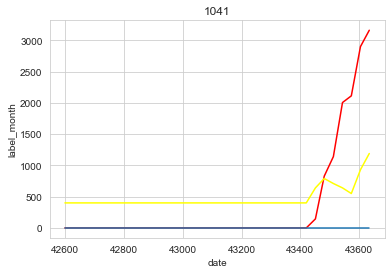

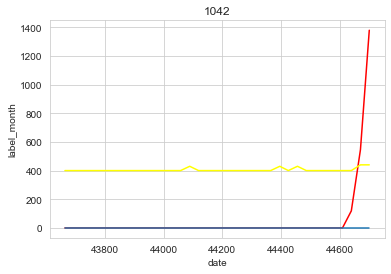

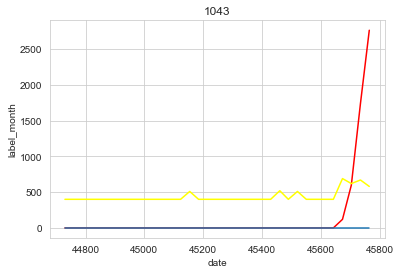

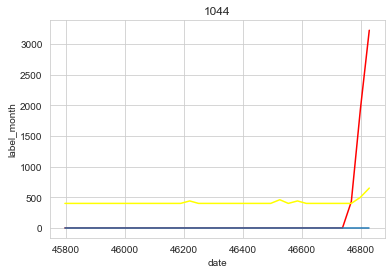

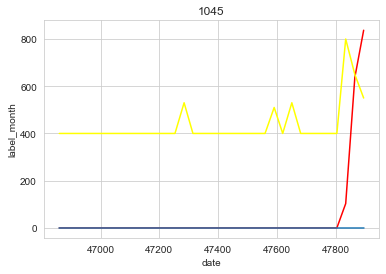

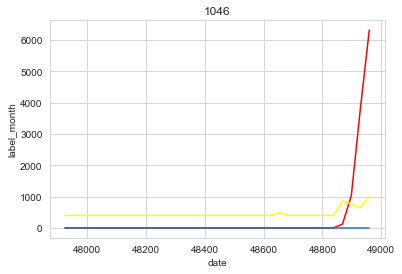

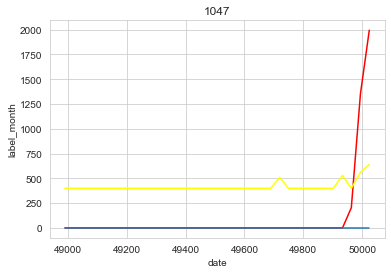

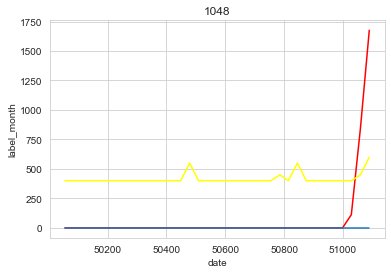

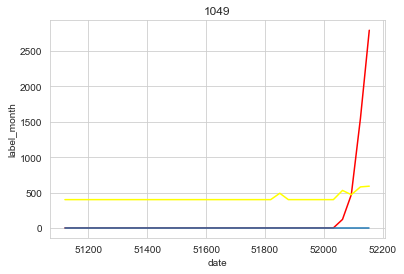

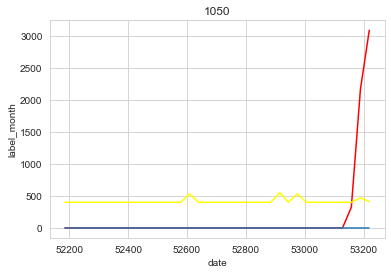

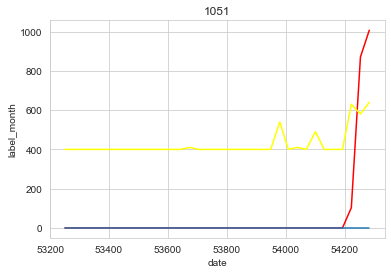

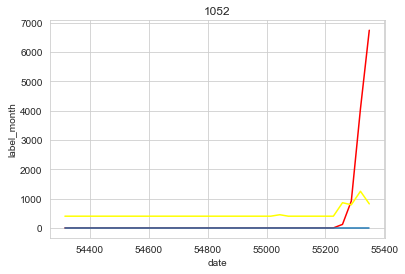

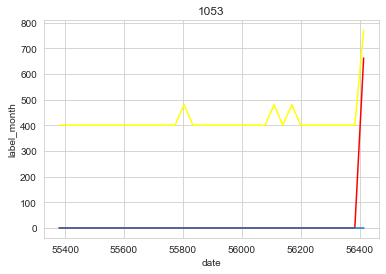

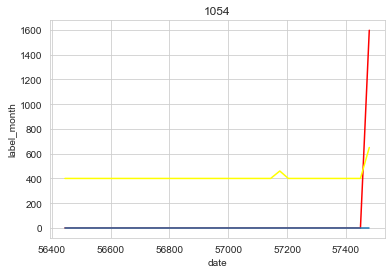

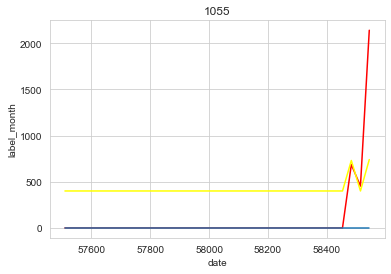

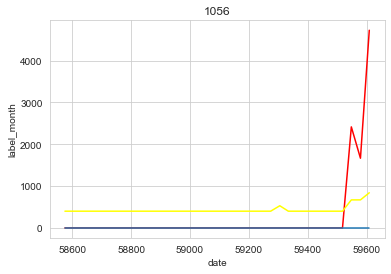

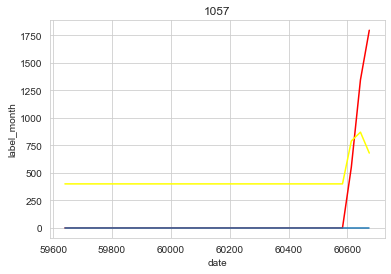

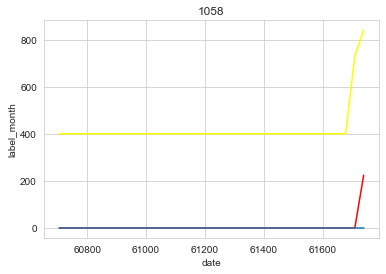

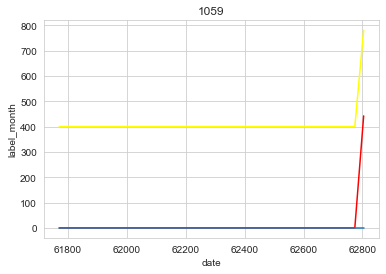

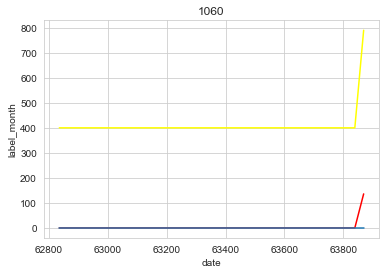

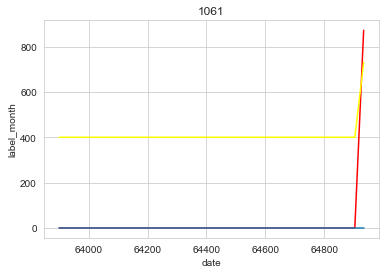

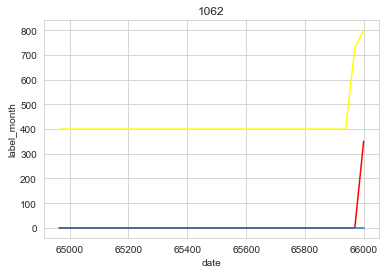

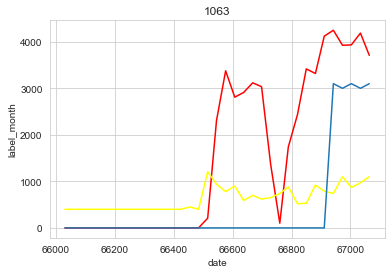

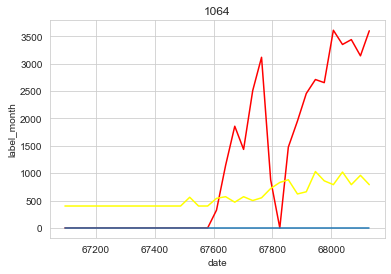

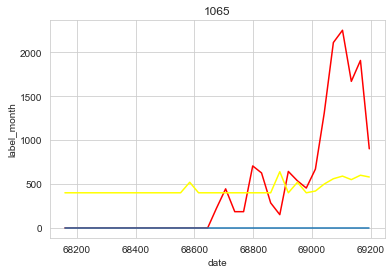

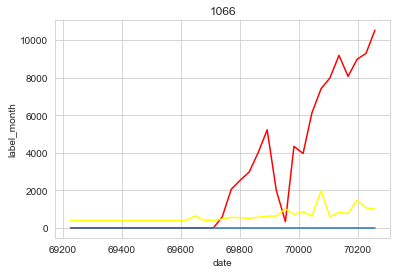

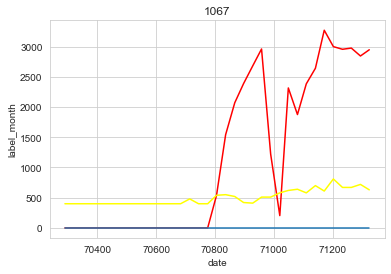

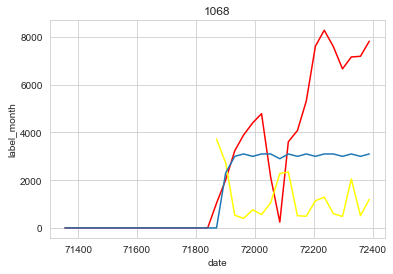

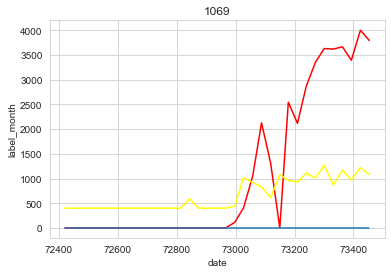

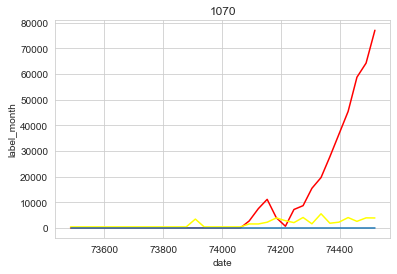

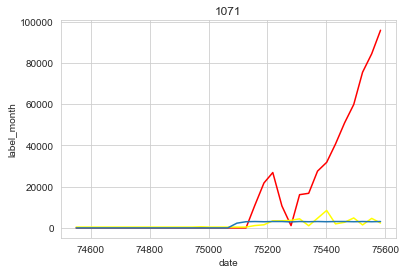

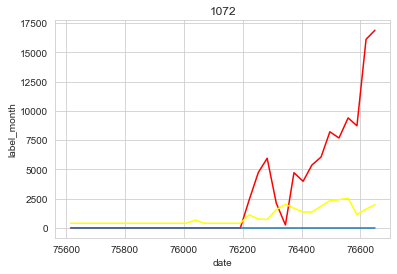

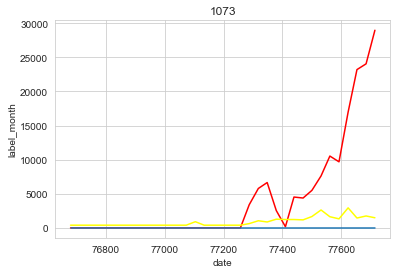

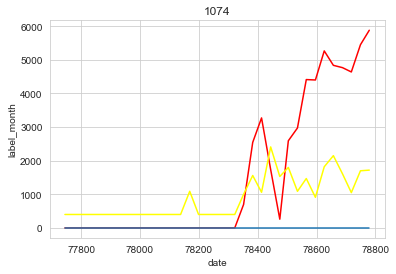

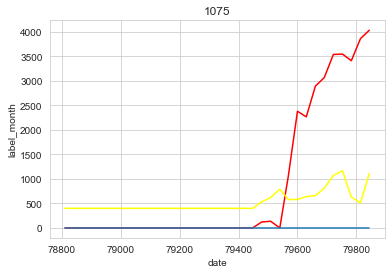

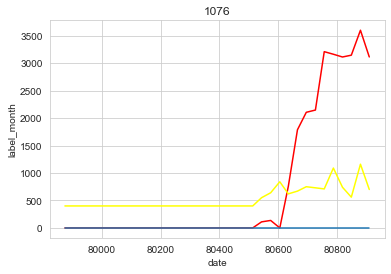

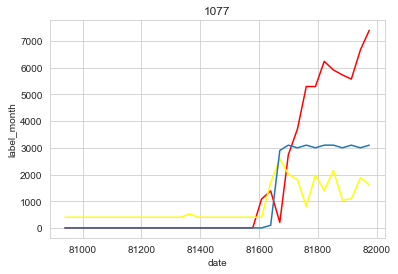

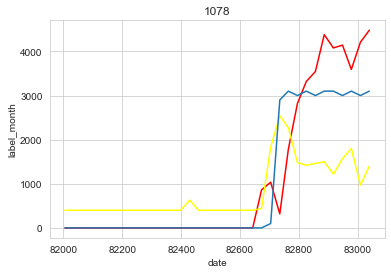

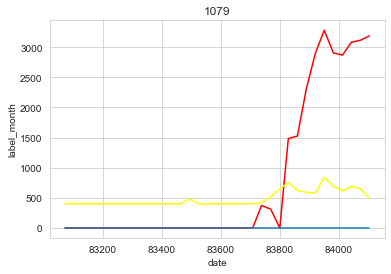

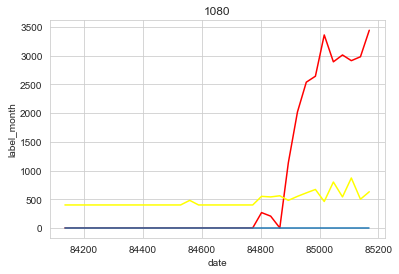

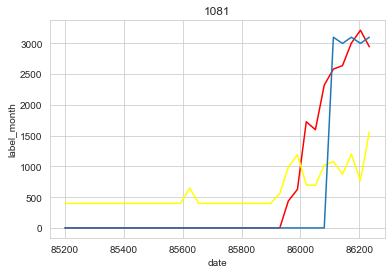

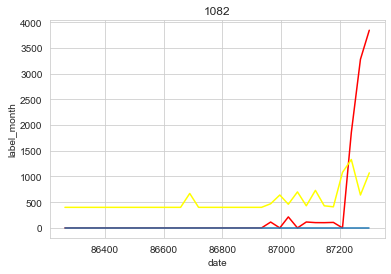

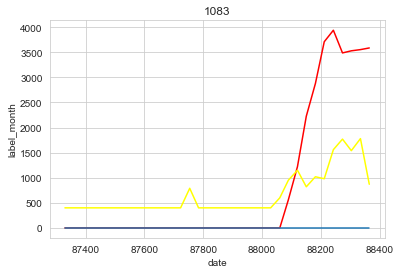

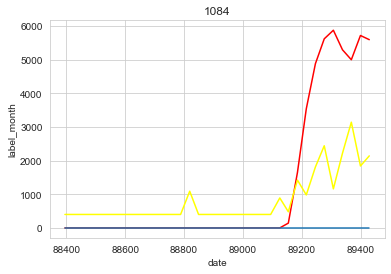

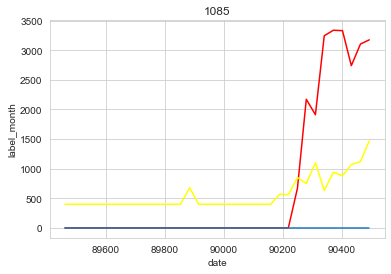

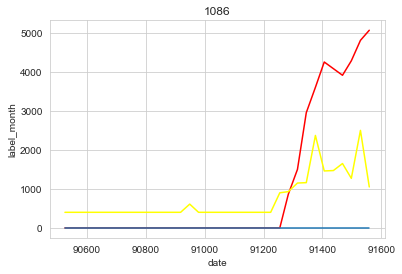

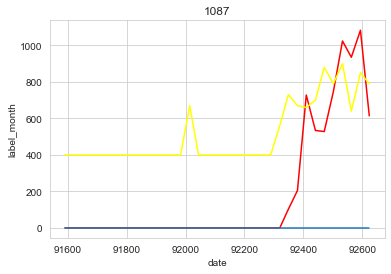

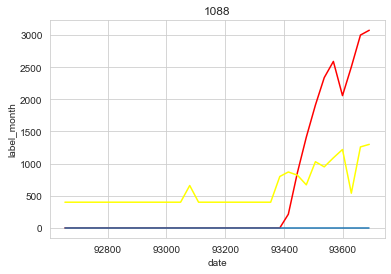

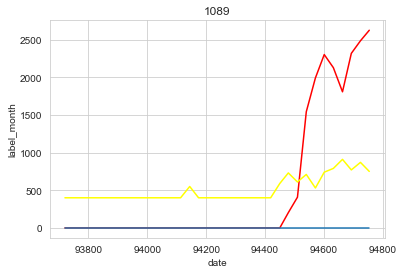

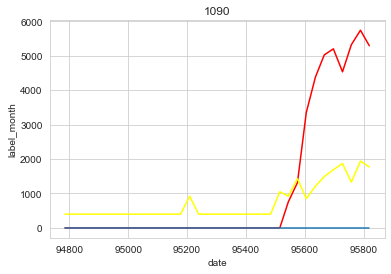

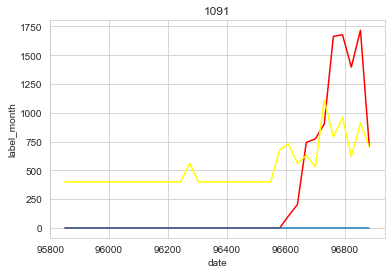

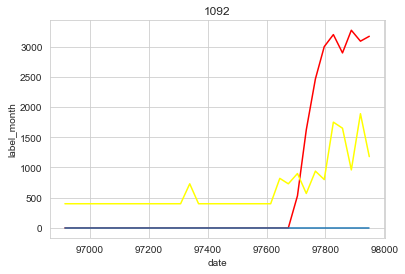

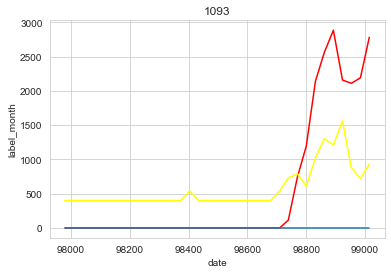

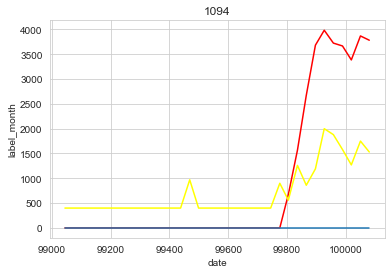

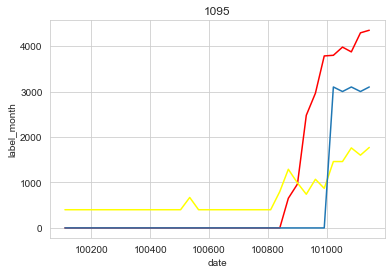

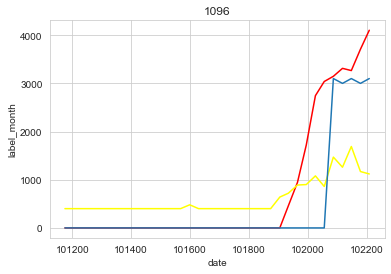

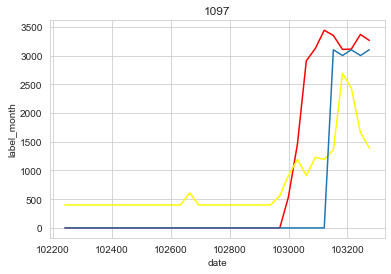

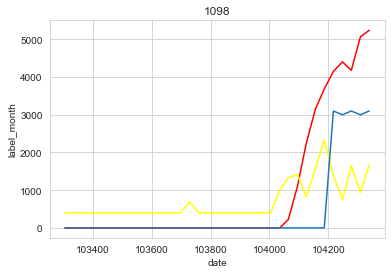

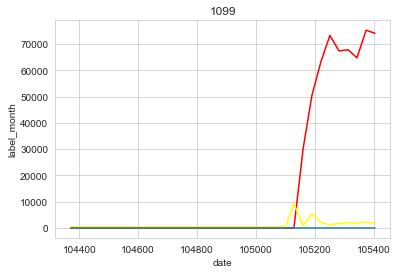

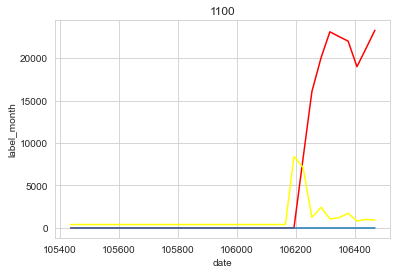

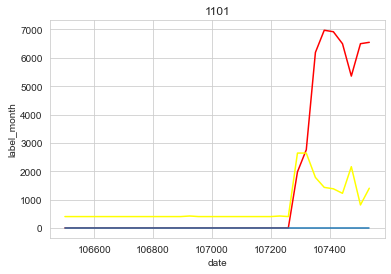

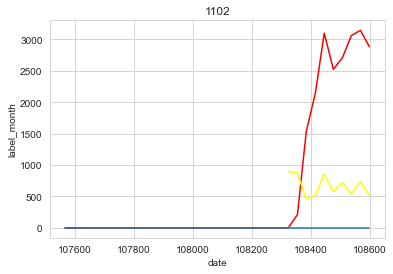

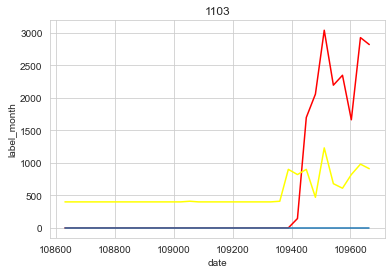

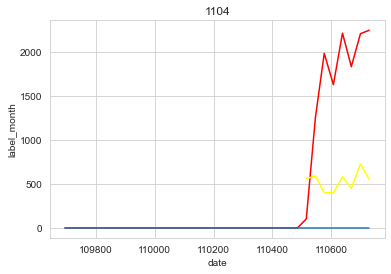

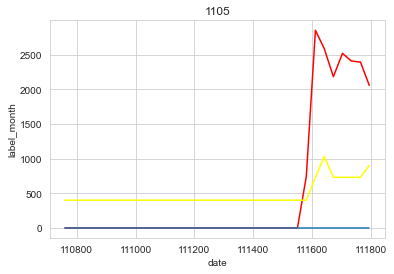

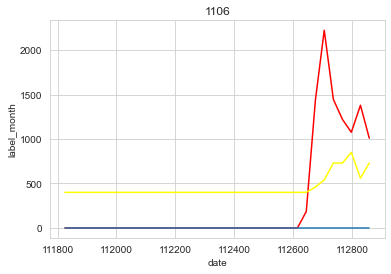

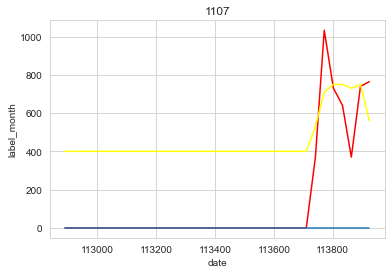

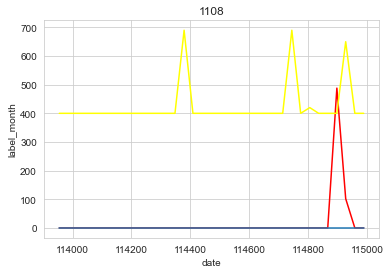

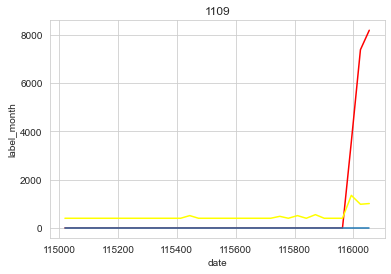

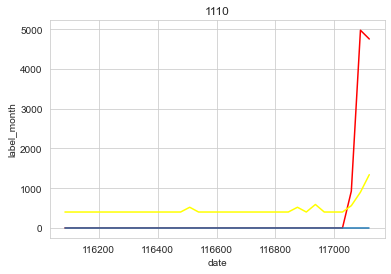

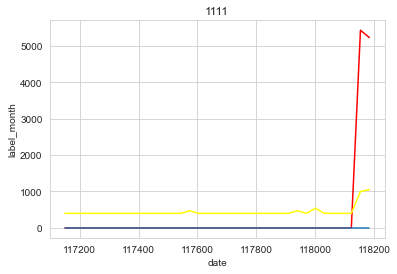

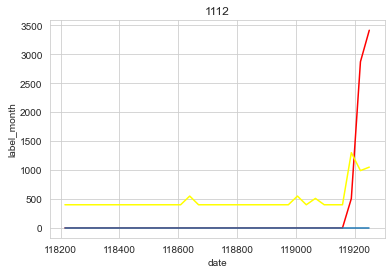

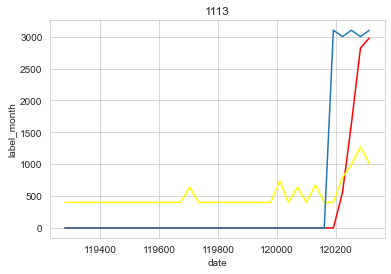

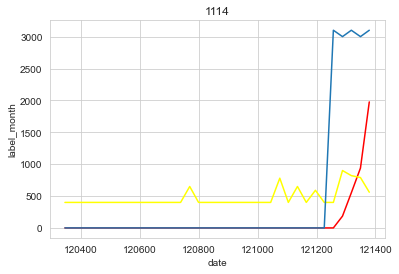

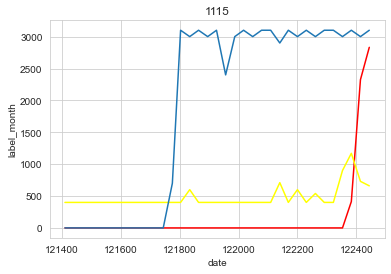

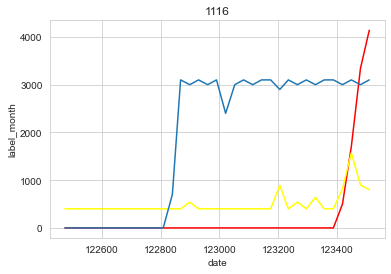

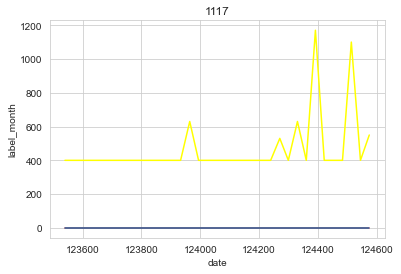

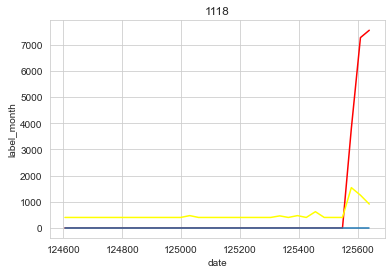

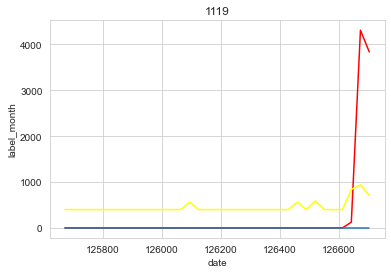

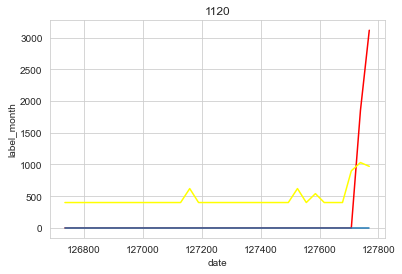

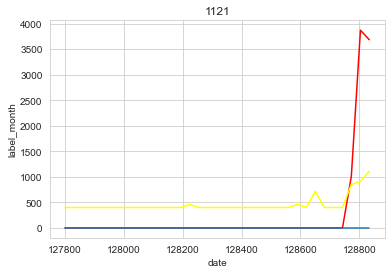

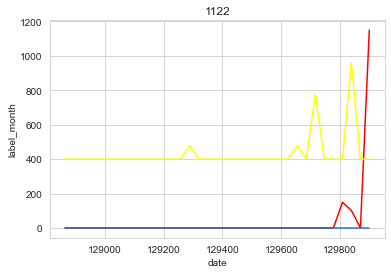

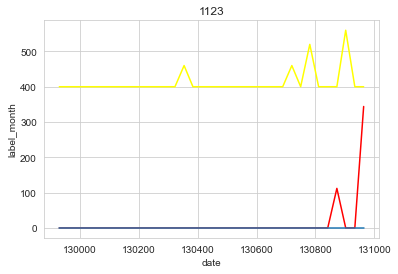

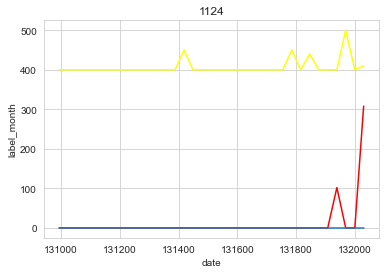

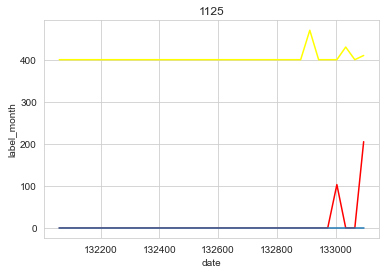

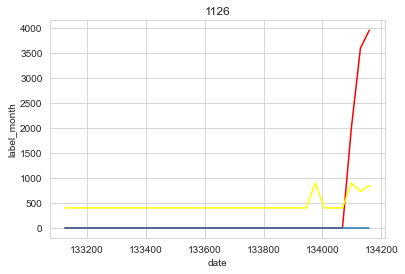

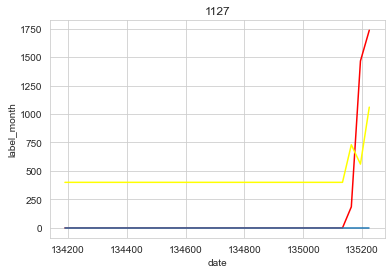

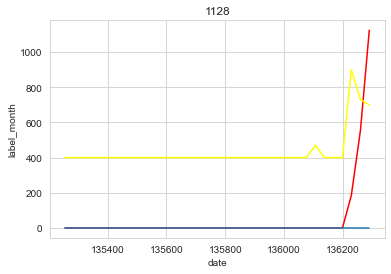

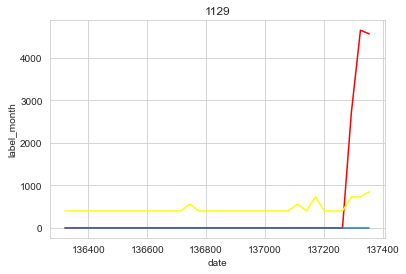

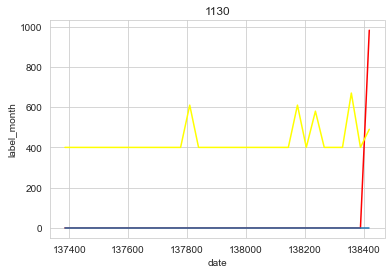

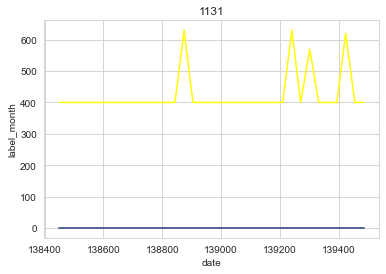

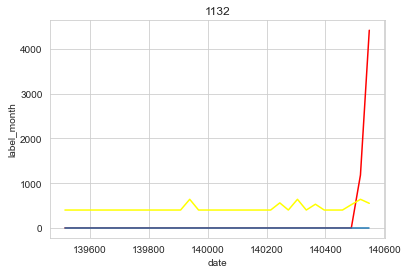

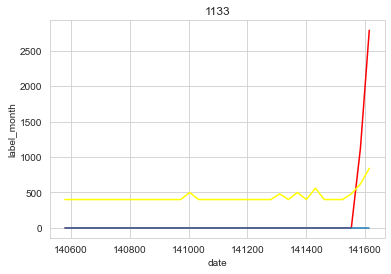

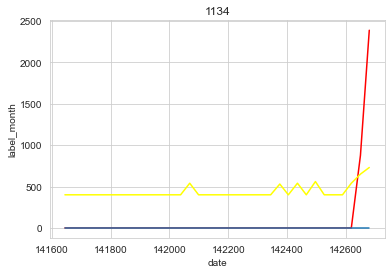

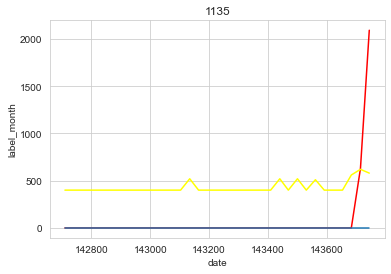

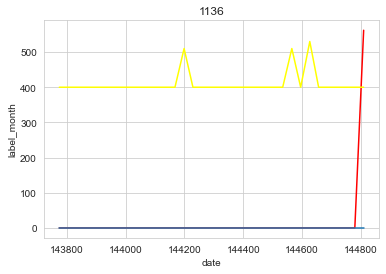

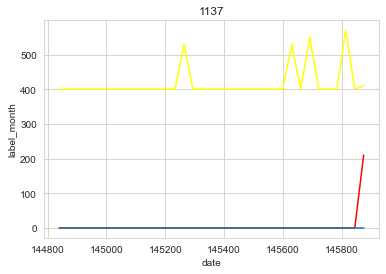

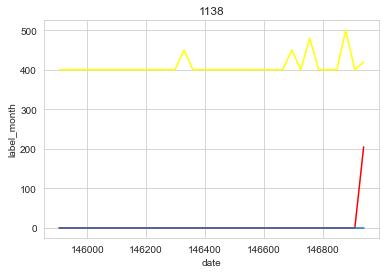

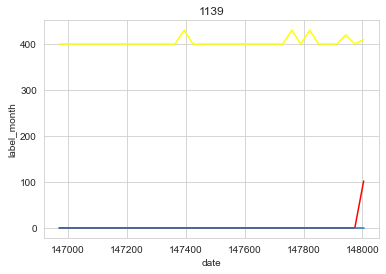

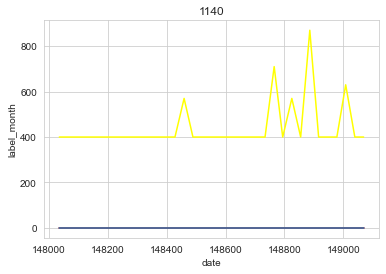

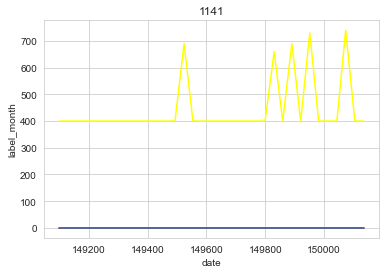

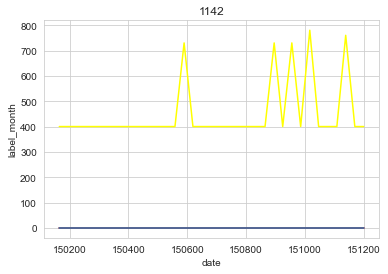

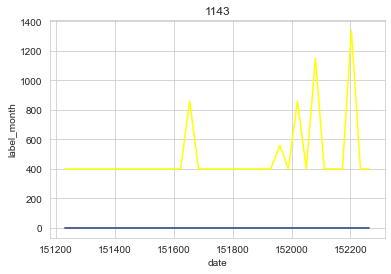

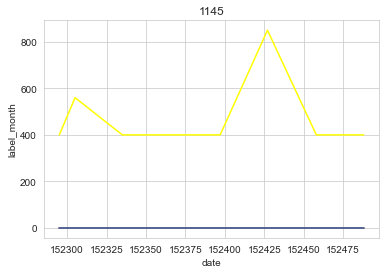

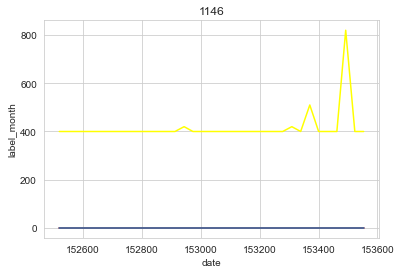

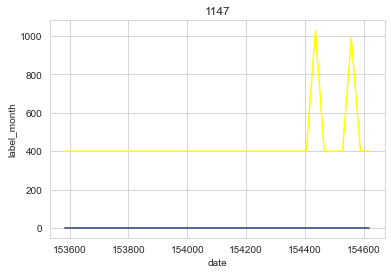

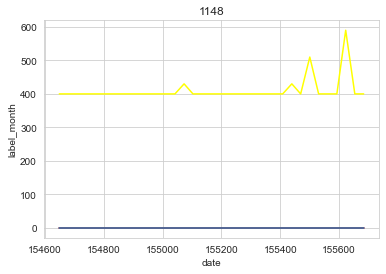

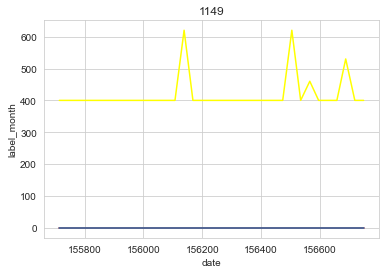

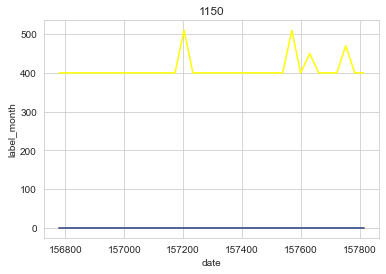

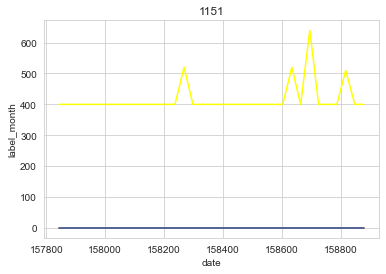

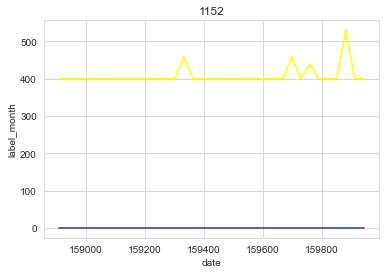

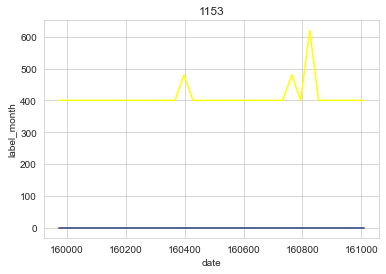

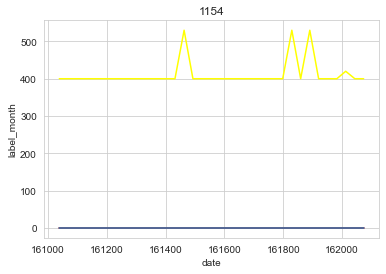

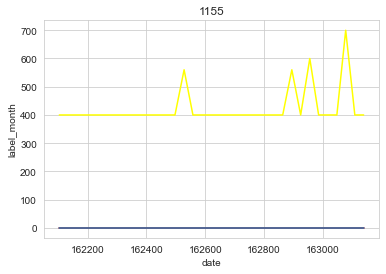

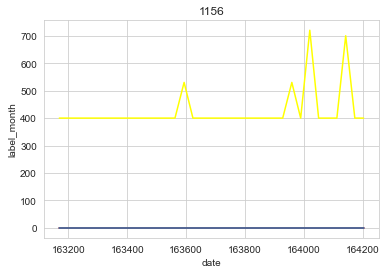

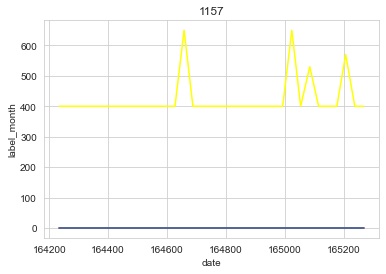

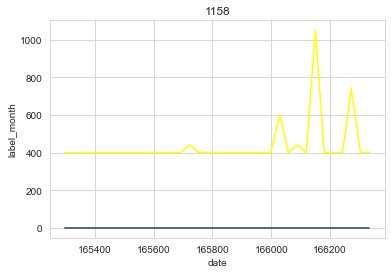

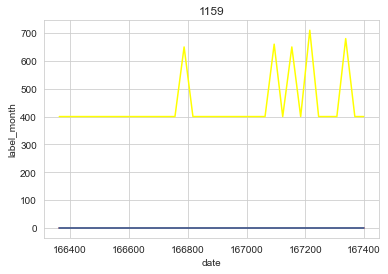

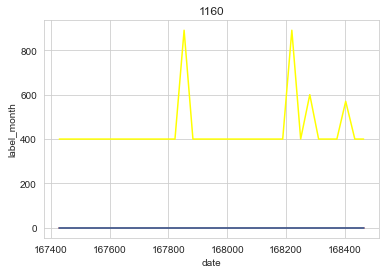

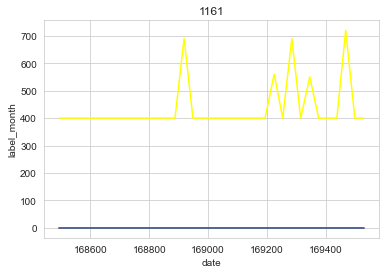

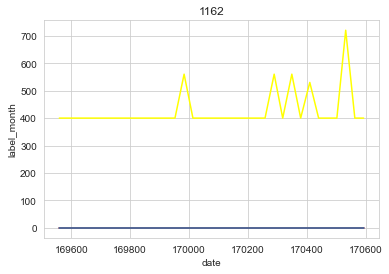

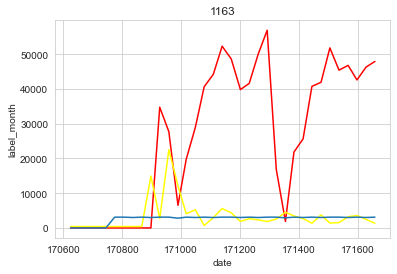

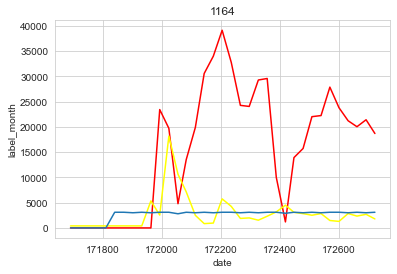

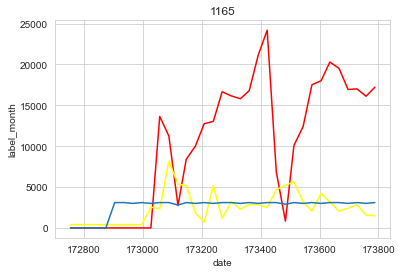

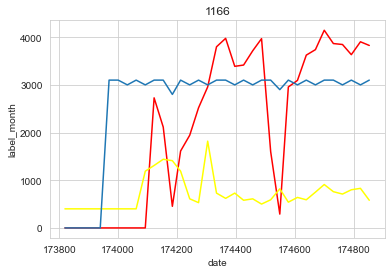

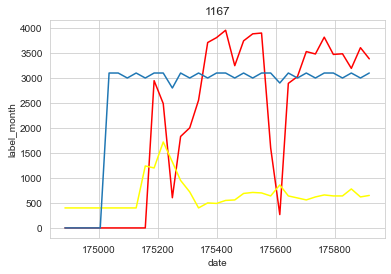

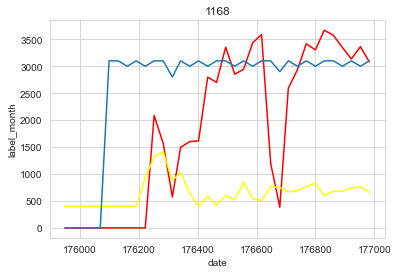

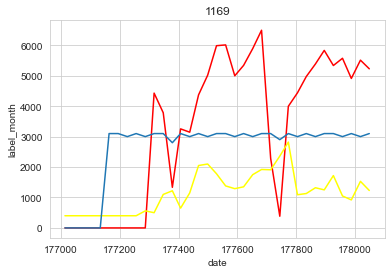

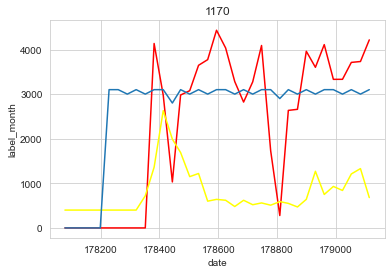

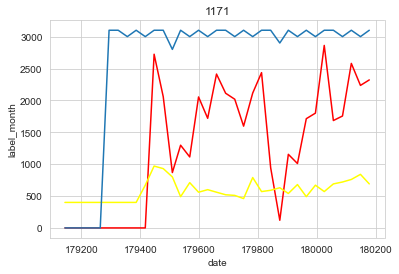

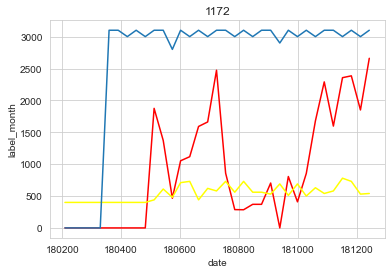

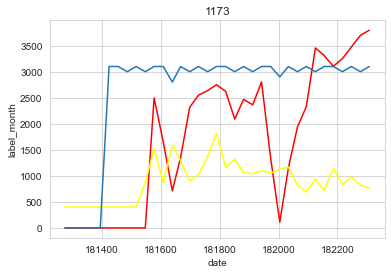

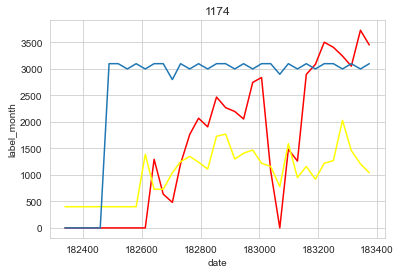

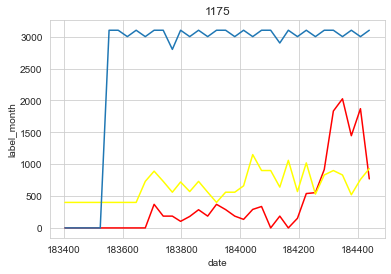

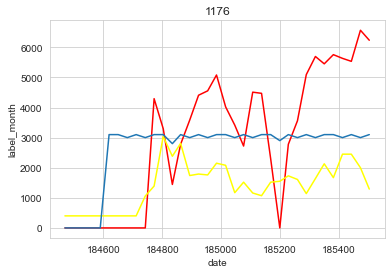

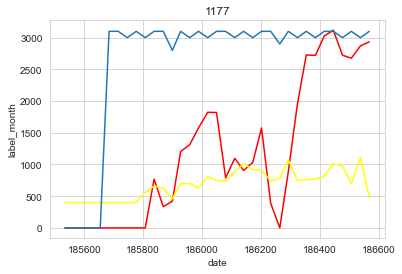

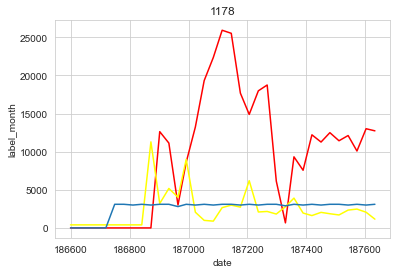

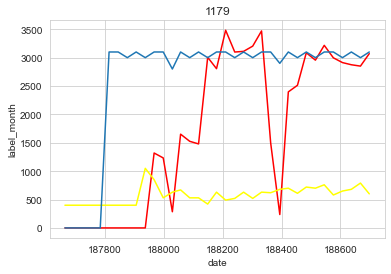

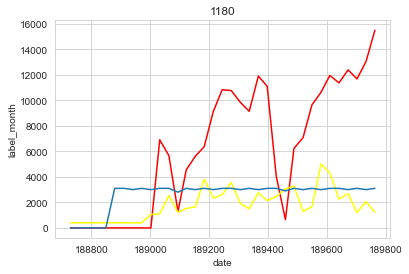

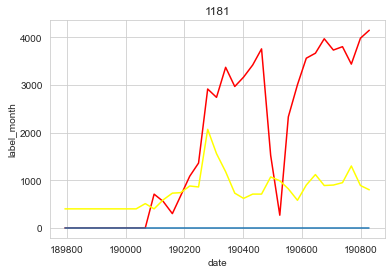

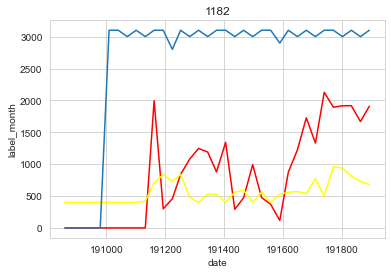

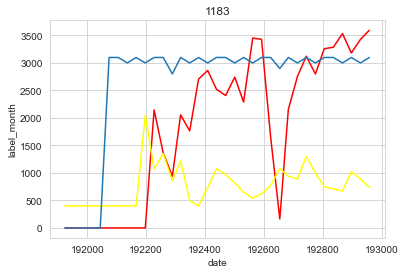

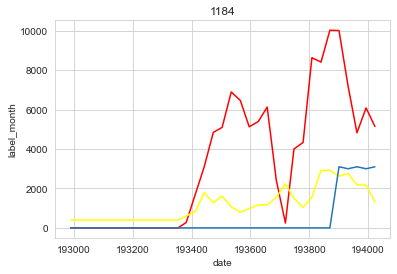

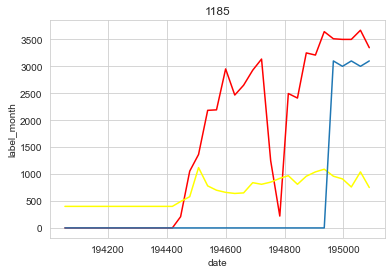

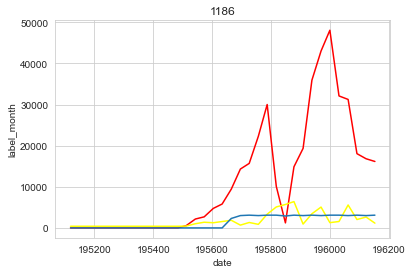

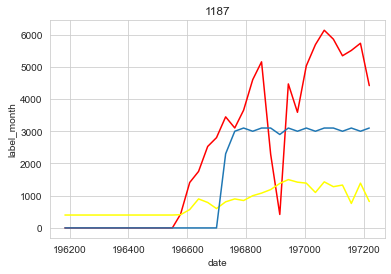

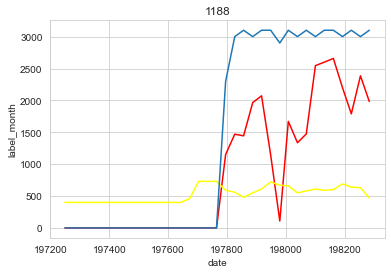

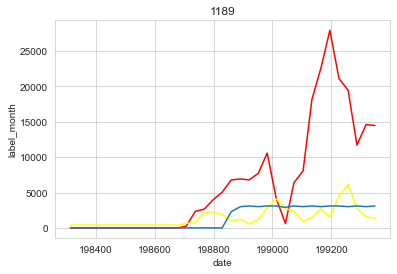

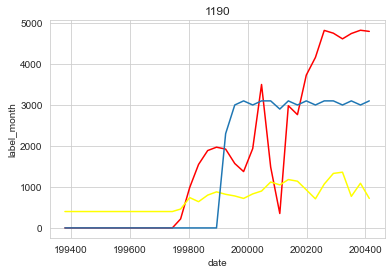

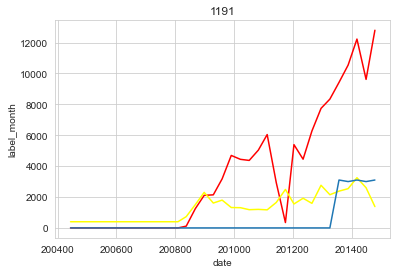

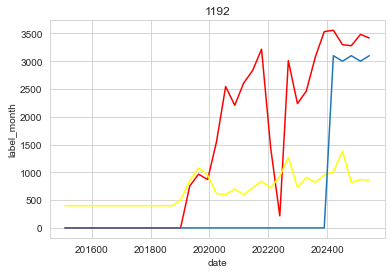

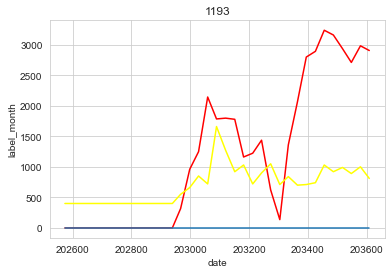

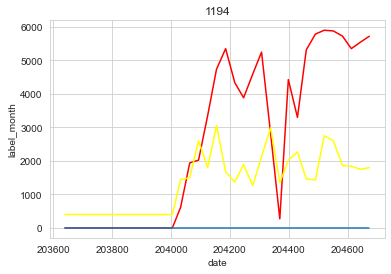

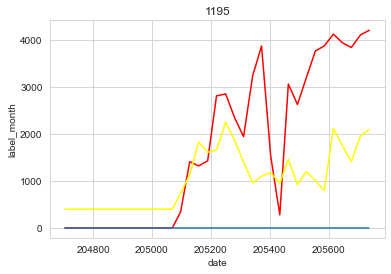

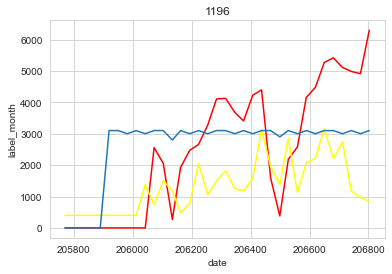

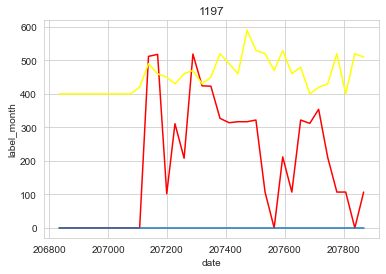

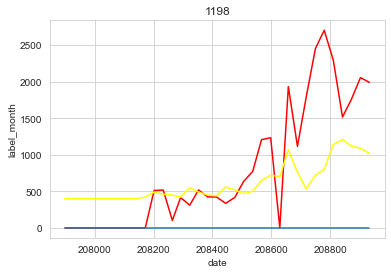

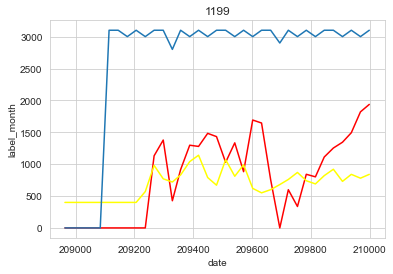

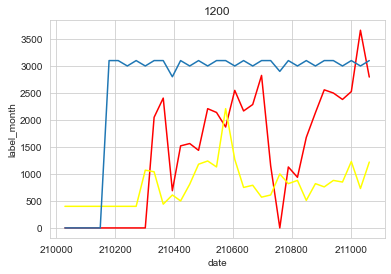

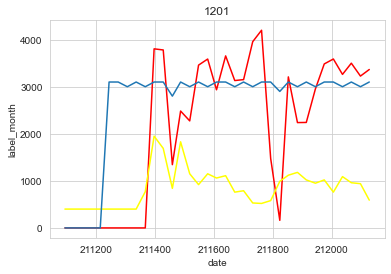

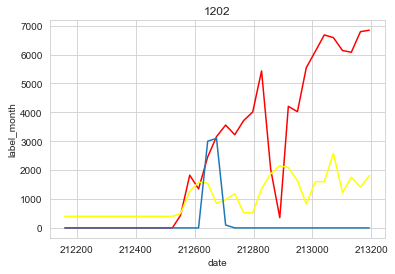

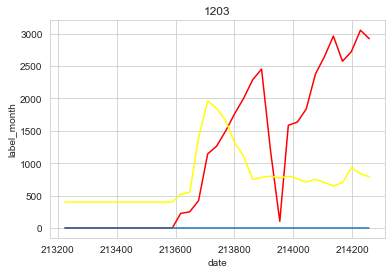

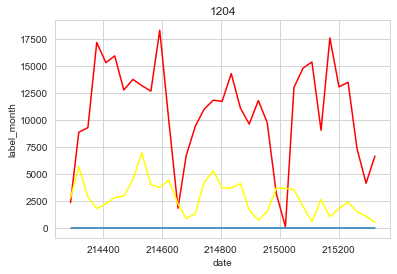

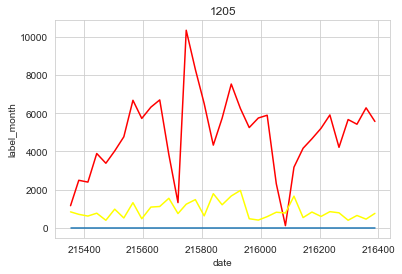

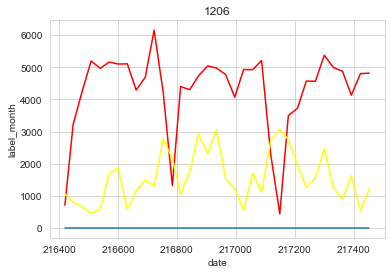

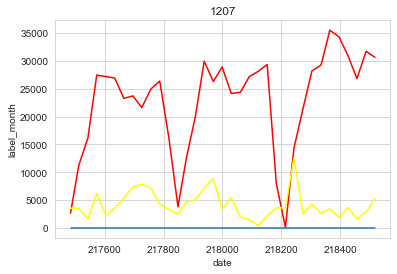

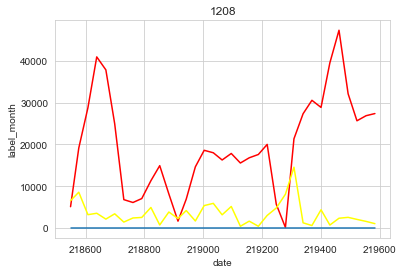

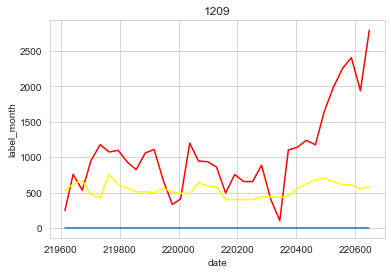

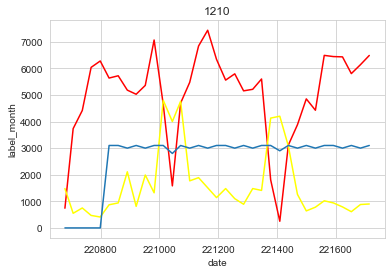

In [35]:
for i in train_data["product_id"].unique():
    data = train_data[train_data["product_id"] == i]
    plt.figure()
    plt.plot(data.index, data.label_month, color="red")
    #plt.plot(data.index, data.start_stock*10, color="blue")
    plt.plot(data.index, data.end_stock*10, color="yellow")
    #plt.plot(data.index, data.stock_diff*10, color="green")
    #plt.plot(data.index, abs(data.stock_diff*10), color="k")
    plt.plot(data.index, data.sale_num*100)
    plt.title(i)
    plt.xlabel("date")
    plt.ylabel("label_month")
    plt.show()

1.有部分数据没有销量，在训练中删掉该数据

2.有新品，考虑删除还未开始售卖之前的数据

In [24]:
train_data.corr()

product_id  is_sale_day      year     month     order  \
product_id     1.000000     0.232192  0.000862  0.000393  0.000937   
is_sale_day    0.232192     1.000000  0.194860  0.078370  0.144003   
year           0.000862     0.194860  1.000000 -0.058383  0.423872   
month          0.000393     0.078370 -0.058383  1.000000  0.734923   
order          0.000937     0.144003  0.423872  0.734923  1.000000   
start_stock    0.099578     0.315039  0.176324 -0.002611  0.049158   
end_stock      0.090512     0.312235  0.196424 -0.020943  0.061495   
label_month    0.095895     0.276122  0.196961  0.131866  0.236553   
sale_num       0.234652     0.995419  0.194829  0.078943  0.145252   
sale_day_0    -0.232192    -1.000000 -0.194860 -0.078370 -0.144003   
sale_day_1     0.232192     1.000000  0.194860  0.078370  0.144003   

             start_stock  end_stock  label_month  sale_num  sale_day_0  \
product_id      0.099578   0.090512     0.095895  0.234652   -0.232192   
is_sale_day     0.315039   0.312235     0.276122  0.995419   -1.000000   
year            0.176324   0.196424     0.196961  0.194829   -0.194860   
month          -0.002611  -0.020943     0.131866  0.078943   -0.078370   
order           0.049158   0.061495     0.236553  0.145252   -0.144003   
start_stock     1.000000   0.682055     0.500036  0.313153   -0.315039   
end_stock       0.682055   1.000000     0.498446  0.311795   -0.312235   
label_month     0.500036   0.498446     1.000000  0.277755   -0.276122   
sale_num        0.313153   0.311795     0.277755  1.000000   -0.995419   
sale_day_0     -0.315039  -0.312235    -0.276122 -0.995419    1.000000   
sale_day_1      0.315039   0.312235     0.276122  0.995419   -1.000000   

             sale_day_1  
product_id     0.232192  
is_sale_day    1.000000  
year           0.194860  
month          0.078370  
order          0.144003  
start_stock    0.315039  
end_stock      0.312235  
label_month    0.276122  
sale_num       0.995419  
sale_day_0    -1.000000  
sale_day_1     1.000000

In [28]:
for i in train_data["product_id"].unique():
    print(i)
    print(train_data[train_data["product_id"] == i].corr())

1001
             product_id  is_sale_day      year     month     order  \
product_id          NaN          NaN       NaN       NaN       NaN   
is_sale_day         NaN     1.000000  0.829988  0.114746  0.495911   
year                NaN     0.829988  1.000000 -0.059173  0.422915   
month               NaN     0.114746 -0.059173  1.000000  0.734966   
order               NaN     0.495911  0.422915  0.734966  1.000000   
start_stock         NaN     0.082478  0.129780 -0.415793 -0.501576   
end_stock           NaN    -0.051003  0.151693 -0.377649 -0.329340   
label_month         NaN    -0.149024 -0.441002  0.471861  0.395470   
sale_num            NaN     0.993599  0.847139  0.095905  0.480492   
sale_day_0          NaN    -1.000000 -0.829988 -0.114746 -0.495911   
sale_day_1          NaN     1.000000  0.829988  0.114746  0.495911   

             start_stock  end_stock  label_month  sale_num  sale_day_0  \
product_id           NaN        NaN          NaN       NaN         NaN   
is_sal

sale_day_1          NaN  
1049
             product_id  is_sale_day      year     month     order  \
product_id          NaN          NaN       NaN       NaN       NaN   
is_sale_day         NaN          NaN       NaN       NaN       NaN   
year                NaN          NaN  1.000000 -0.059173  0.422915   
month               NaN          NaN -0.059173  1.000000  0.734966   
order               NaN          NaN  0.422915  0.734966  1.000000   
start_stock         NaN          NaN  0.363591  0.400339  0.487250   
end_stock           NaN          NaN  0.456275  0.327678  0.448654   
label_month         NaN          NaN  0.320322  0.377536  0.462112   
sale_num            NaN          NaN       NaN       NaN       NaN   
sale_day_0          NaN          NaN       NaN       NaN       NaN   
sale_day_1          NaN          NaN       NaN       NaN       NaN   

             start_stock  end_stock  label_month  sale_num  sale_day_0  \
product_id           NaN        NaN          NaN      

             product_id  is_sale_day      year     month     order  \
product_id          NaN          NaN       NaN       NaN       NaN   
is_sale_day         NaN     1.000000  0.489525  0.404759  0.589518   
year                NaN     0.489525  1.000000 -0.059173  0.422915   
month               NaN     0.404759 -0.059173  1.000000  0.734966   
order               NaN     0.589518  0.422915  0.734966  1.000000   
start_stock         NaN     0.802203  0.645720  0.328316  0.689286   
end_stock           NaN     0.839340  0.715465  0.240048  0.578056   
label_month         NaN     0.837444  0.675361  0.335636  0.706626   
sale_num            NaN     0.999851  0.489452  0.404699  0.589196   
sale_day_0          NaN    -1.000000 -0.489525 -0.404759 -0.589518   
sale_day_1          NaN     1.000000  0.489525  0.404759  0.589518   

             start_stock  end_stock  label_month  sale_num  sale_day_0  \
product_id           NaN        NaN          NaN       NaN         NaN   
is_sale_day

             product_id  is_sale_day      year     month     order  \
product_id          NaN          NaN       NaN       NaN       NaN   
is_sale_day         NaN          NaN       NaN       NaN       NaN   
year                NaN          NaN  1.000000 -0.059173  0.422915   
month               NaN          NaN -0.059173  1.000000  0.734966   
order               NaN          NaN  0.422915  0.734966  1.000000   
start_stock         NaN          NaN       NaN       NaN       NaN   
end_stock           NaN          NaN  0.336818 -0.030629  0.136549   
label_month         NaN          NaN  0.205642  0.271762  0.325493   
sale_num            NaN          NaN       NaN       NaN       NaN   
sale_day_0          NaN          NaN       NaN       NaN       NaN   
sale_day_1          NaN          NaN       NaN       NaN       NaN   

             start_stock  end_stock  label_month  sale_num  sale_day_0  \
product_id           NaN        NaN          NaN       NaN         NaN   
is_sale_day

             product_id  is_sale_day      year     month     order  \
product_id          NaN          NaN       NaN       NaN       NaN   
is_sale_day         NaN     1.000000  0.817178  0.229399  0.483712   
year                NaN     0.817178  1.000000 -0.059173  0.422915   
month               NaN     0.229399 -0.059173  1.000000  0.734966   
order               NaN     0.483712  0.422915  0.734966  1.000000   
start_stock         NaN     0.857755  0.897767  0.148728  0.535554   
end_stock           NaN     0.784464  0.851784  0.058867  0.427602   
label_month         NaN     0.777436  0.823454  0.353238  0.775606   
sale_num            NaN     0.967612  0.821854  0.251872  0.511029   
sale_day_0          NaN    -1.000000 -0.817178 -0.229399 -0.483712   
sale_day_1          NaN     1.000000  0.817178  0.229399  0.483712   

             start_stock  end_stock  label_month  sale_num  sale_day_0  \
product_id           NaN        NaN          NaN       NaN         NaN   
is_sale_day

活动数据与销售数量相关性并不是很大，可带可不带

In [29]:
train_data["type_num"] = train_data.groupby(["type","year","month"])["label_month"].transform("sum")

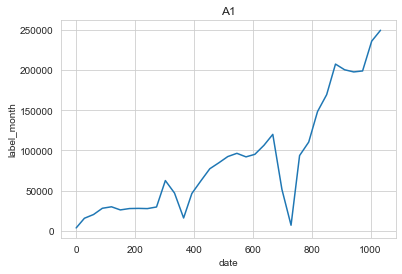

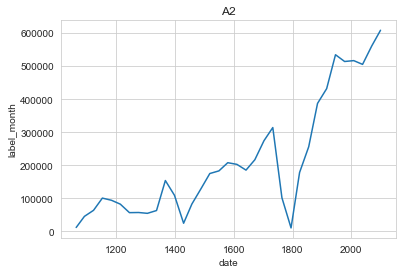

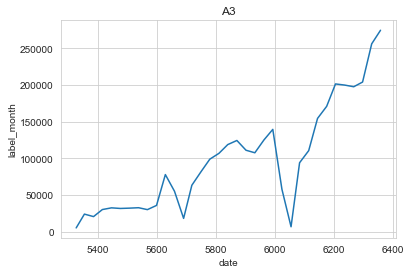

In [32]:
for i in train_data["type"].unique():
    data = train_data[train_data["type"] == i].drop_duplicates(["type","year","month"])
    plt.figure()
    plt.plot(data.index, data.type_num)
    plt.title(i)
    plt.xlabel("date")
    plt.ylabel("label_month")
    plt.show()

三种类型的销售趋势都是一样的

A1A3的销售数量相同

A2的销售数量最多